Emma Alber, Data Science for Psychologists, June 2021

## Final Project: A Closer Look at the Human Freedom Index

### 1. Introduction
For more than a year now, citizens around the world have had to get used to terms like "lockdown" and "mandatory masks", as well as to the fact that their state suddenly imposes many and at times very strict rules to follow. This consequence of COVID-19 has fueled heated discussions about the concept of freedom in states whose residents otherwise pay little attention to the issue. Yet the freedom of people has been an important matter before this pandemic, and in many countries the freedom to go to the barber shop is the least of citizens' concerns when it comes to their personal liberty.
This project aims to shed light at the intricacies of human freedom (HF) around the world in the past decades until 2018 by analyzing data used in a paper about the Human Freedom Index (Vásquez & McMahon, 2020). After some background information about the concepts and the data has been given, the distribution of human freedom in different nations will be visualized and compared. Next, the influence of specific factors such as gender, size of government or business regulations on HF will be assessed. Finally, various models to predict HF will be built, tested and the best-fitting one will be chosen.

### 2. Background
There are countless ways to define freedom. This paper adopts the approach of Vásquez and McMahon, authors of the Human Freedom Index 2020 report, who use "negative rights" or "negative liberty" as a working definition of human freedom in their paper. The term negative rights was coined by the philosopher Isaiah Berlin, who wrote that negative liberty concerns "the area within which the subject — a person or group of persons — is or should be left to do or be what he is able to do or be, without interference by other persons (Berlin, 1969, p. 119)." Accordingly, this paper will compare countries and regions exclusively on the notion of how much (or little) their citizens experience constraint of various forms - especially by their government. While data collection and analysis can be done in a relatively objective manner, it is important to note that the political attitudes of the researchers can play a role, particularly in the selection of variables to be collected and in the interpretation of the results. It should be mentioned here that the editors of the HFI, which is the sole data source for this paper, are two libertarian "think tanks" based in the U.S. and Canada, respectively. Vásquez and McMahon (2020) collected and analyzed a broad range of variables operationalizing their definition of freedom from 162 countries. All attained measures were assigned values between 0 and 10, with a higher number representing more freedom (i.e., more safety, human rights, diversity, etc.). The data was aggregated into three indices: An index of personal freedom (PF) and for economic freedom (EF) respectively, whose combination results in the main index of HI. While PF serves as an index for specific personal freedoms such as freedom of religion, expression and identity, EF measures the possibility to engage in voluntary (financial) exchange and competition, and the safety of people and their property. The results of the HFI allow us to evaluate the development of HF over the past decade (since the first index was created in 2008) and allows us to rank and compare countries, as well as to assess the influence of specific variables on HF.

### 3. Statistical Analyses

#### 3.0 Data Cleaning and Variables of Interest
In order to work with the dataset, it needs to be cleaned and brought into tidy format first.

In [1]:
library(tidyverse)
library(dplyr)
library(ggplot2)

HFI_raw <- read.csv('Data HFI/hfi_cc_2020.csv') #load dataset
head(HFI_raw) #look at structure of dataset
nrow(HFI_raw)

NAs <- complete.cases(HFI_raw) 
summary(NAs) #check amount of NAs
HFI_NONA <- na.omit(HFI_raw) #remove NAs in case I need a df without NAs later
nrow(HFI_NONA)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



X year ISO_code countries region         hf_score hf_rank hf_quartile
1 0 2018 ALB      Albania   Eastern Europe 7.81     43      2          
2 1 2017 ALB      Albania   Eastern Europe 7.78     44      2          
3 2 2016 ALB      Albania   Eastern Europe 7.63     50      2          
4 3 2015 ALB      Albania   Eastern Europe 7.55     52      2          
5 4 2014 ALB      Albania   Eastern Europe 7.65     48      2          
6 5 2013 ALB      Albania   Eastern Europe 7.52     54      2          
  pf_rol_procedural pf_rol_civil ⋯ ef_regulation_business_bureaucracy
1 6.0               4.8          ⋯ 6.7                               
2 6.3               4.4          ⋯ 6.7                               
3 6.7               4.5          ⋯ 6.0                               
4 6.7               4.5          ⋯ 6.0                               
5 6.1               4.8          ⋯ 6.0                               
6 5.6               5.0          ⋯ 6.0                               
  ef_regulation_business_start ef_regulation_business_bribes
1 9.7                          5.4                          
2 9.7                          6.0                          
3 9.7                          6.0                          
4 9.7                          6.0                          
5 9.7                          6.0                          
6 9.8                          6.0                          
  ef_regulation_business_licensing ef_regulation_business_compliance
1 5.6                              7.2                              
2 6.0                              7.2                              
3 7.3                              7.1                              
4 7.3                              7.1                              
5 7.2                              6.0                              
6 7.2                              6.0                              
  ef_regulation_business ef_regulation ef_score ef_rank womens_freedom
1 6.7                    7.7           7.80     26      9.26          
2 7.0                    7.9           7.70     36      9.26          
3 7.0                    7.6           7.69     36      7.50          
4 7.0                    7.7           7.70     34      7.50          
5 6.8                    7.8           7.65     37      7.50          
6 6.7                    7.4           7.55     42      7.50

[1] 1782

   Mode   FALSE    TRUE 
logical    1518     264 

[1] 264

The overview of the dataset shows us that we don't need to change much in the format, as it already is in tidy format - the variables are all stored in columns, there is only one variable per column and they all have headers. However, there are quite a few NAs. Because they are systematic (certain countries have more NAs), I will work with the original dataset with NAs and only use the one without NAs if the analysis cannot handle NAs.

There are many variables of interest, and an explanation for them all can be found in the methodology part starting on p. 377 of the original paper: https://www.fraserinstitute.org/sites/default/files/human-freedom-index-2020.pdf. For the sake of space and reading time, I will only list the most important and not self-explanatory ones:
- hf_score: the HF score of this country on a scale from 1-10 with 10 being the highest in freedom
- hf_rank: the HF rank out of 162 assessed countries 
- "womens_freedom": the HF score specifically for women, aggregated from 5 variables measuring women's freedom
- anything with "pf": measures personal freedom
- anything with "ef": measures economic freedom


### 3.1 The Distribution of Freedom in the World

To get an overview of the state of freedom in the world, I will start by inspecting the distribution of freedom in the world and in different regions. We start out by looking at the complete data for the world:

Warning message:
“Removed 80 rows containing non-finite values (stat_density).”


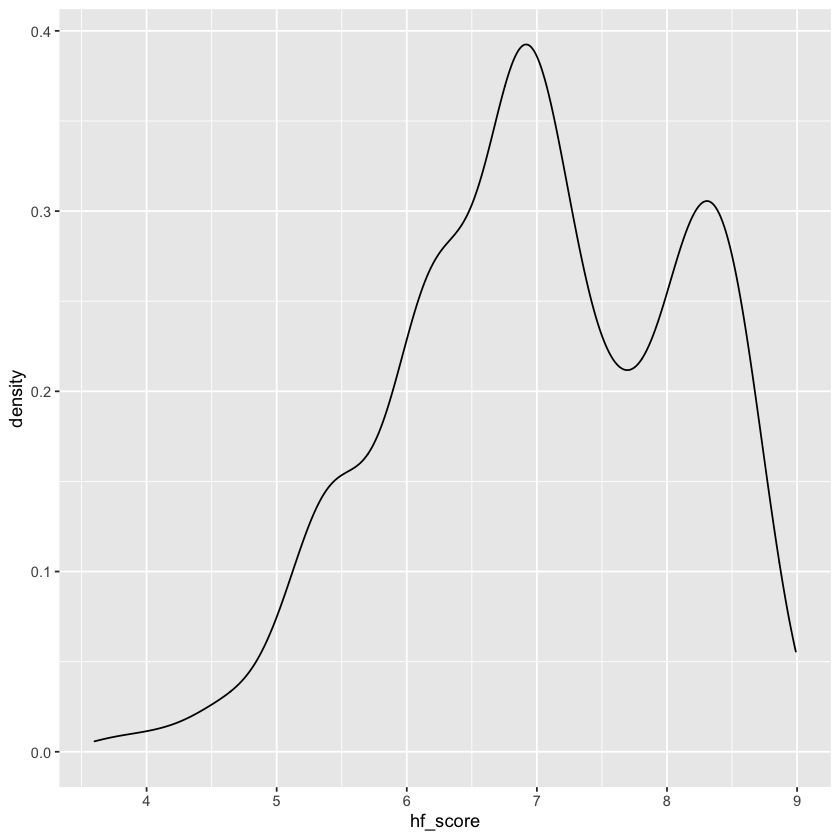

In [2]:
#plot histogram for variable "HF_score" for all available countries
#the warning message is because there were NA for some countries that have not been in the list since 2008, so it's not an issue here
HF_distr_world_decade <- ggplot(HFI_raw, aes(x=hf_score)) + geom_density()
HF_distr_world_decade 

The plots show that HF has a bimodal distribution with the biggest amount of countries at a HFI around 6.75, and another smaller peak at around 8.25. This is, however, the mean from all 10 years that we have data on. Let's see what the distribution looked like only in 2018.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.970   6.220   6.920   6.933   7.862   8.870 

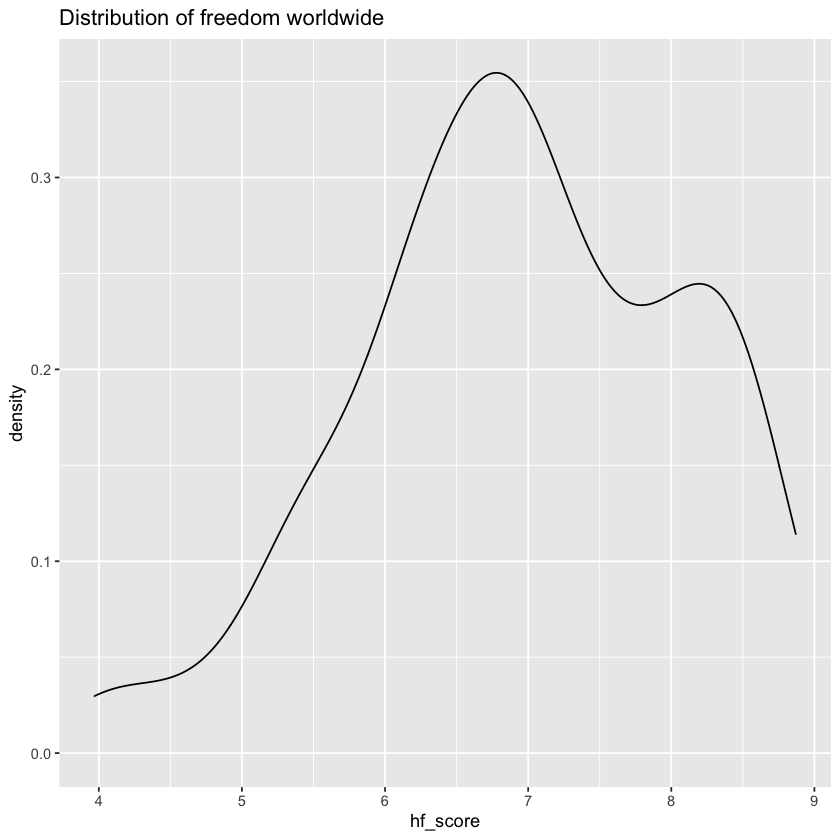

In [3]:
#extract only values for 2018
HFI_2018 <- HFI_raw %>% filter(year == 2018)

#find average HF score in 2018
summary(HFI_2018$hf_score)

#plot histogram for variable "HF_score" for the world on 2018
HF_distr_world_2018 <- ggplot(HFI_2018, aes(x=hf_score)) + geom_density() + ggtitle("Distribution of freedom worldwide")
HF_distr_world_2018

The summary tells us that the mean value of HF worldwide in 2018 was 6.9.
The plot shows that in 2018, there still is a bimodal distribution with approximately the same values at its peaks (6.75 and 8.25), but the peaks have gotten less extreme - this shows that there is a bigger amount of countries with an HFI between 7 and 9 compared to the aggregated data for the decade. 
Next, I will show what the distribution in 2018 looked like for different regions in the world.

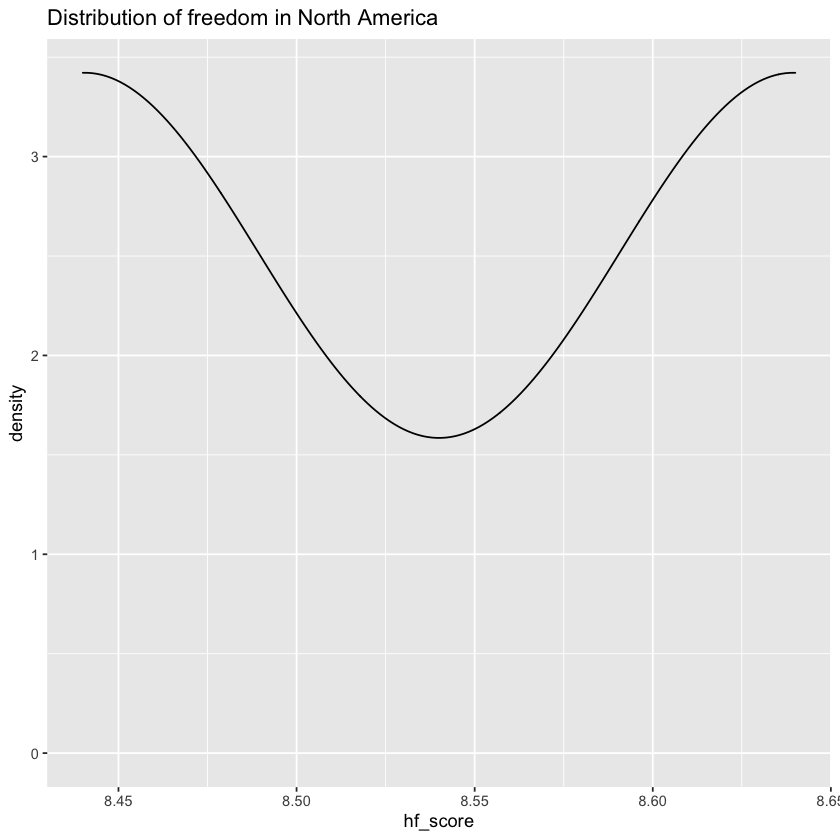

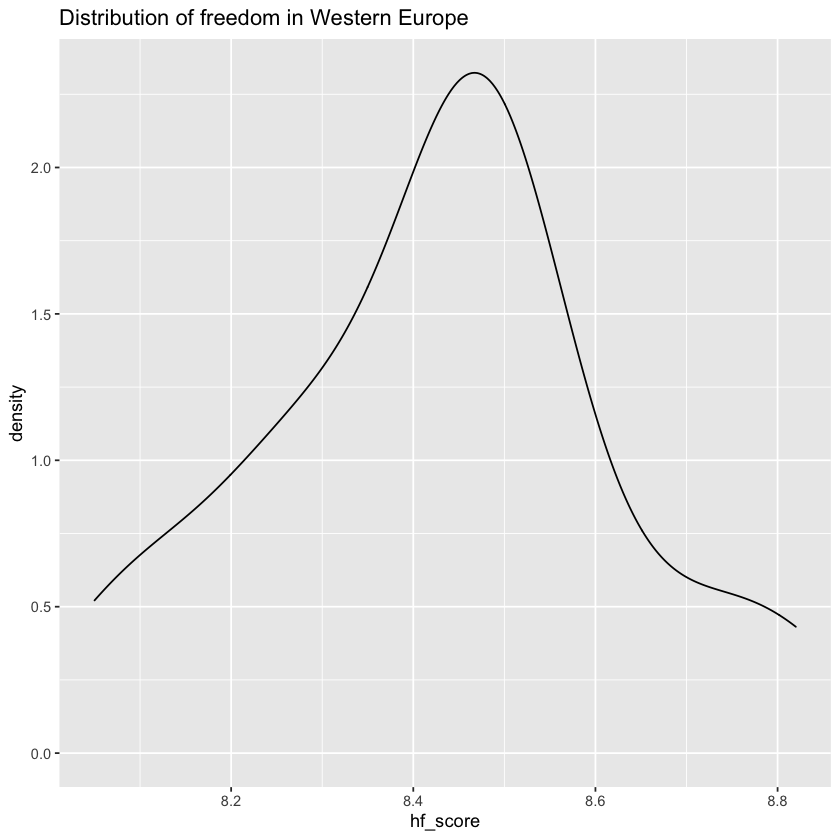

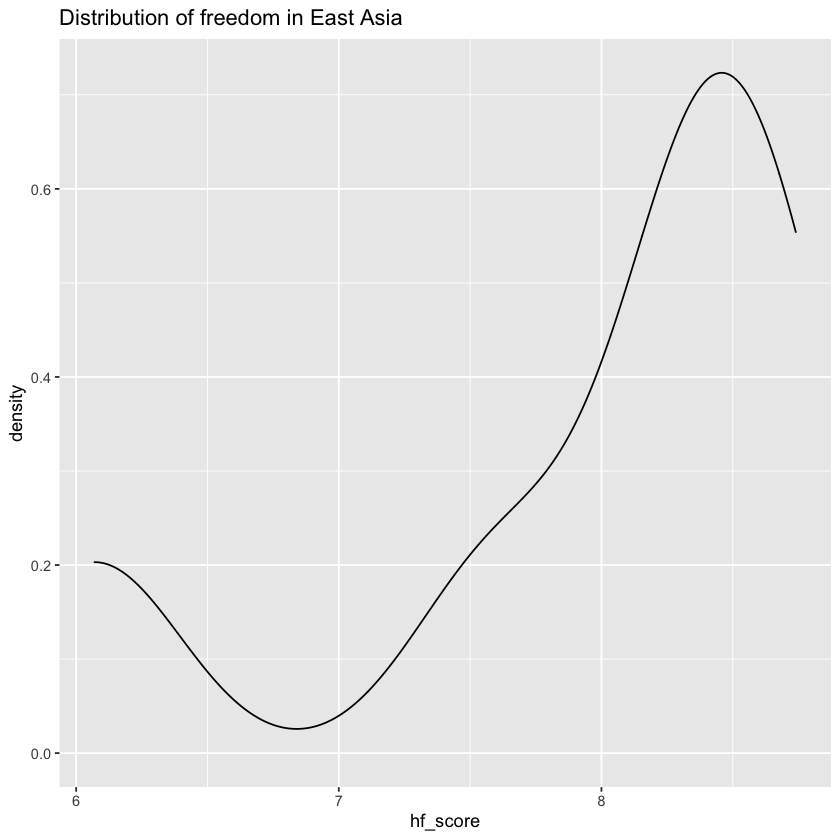

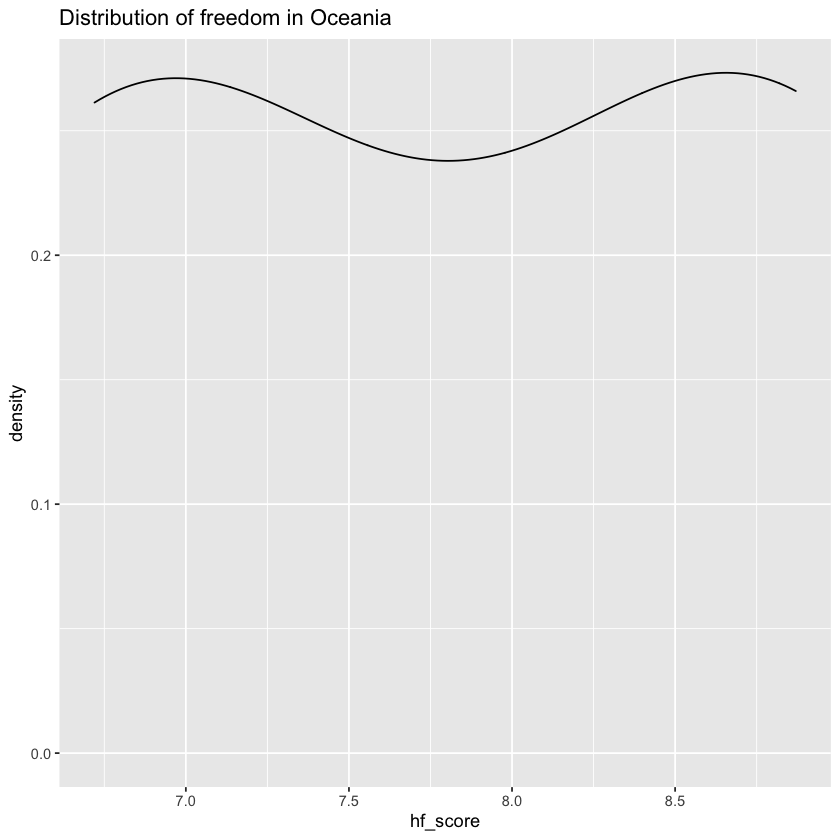

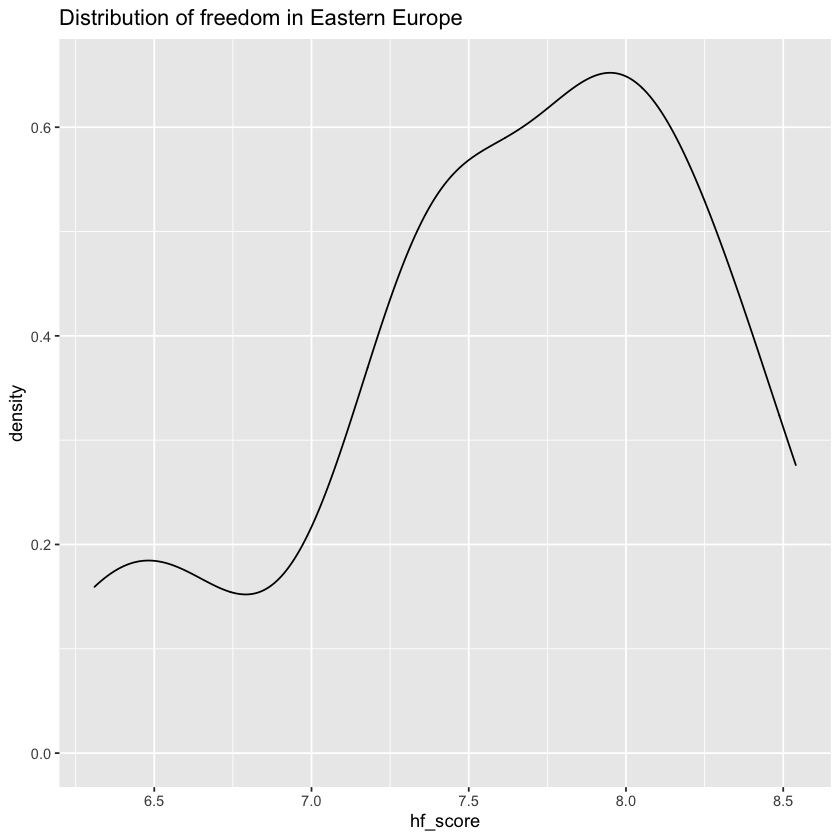

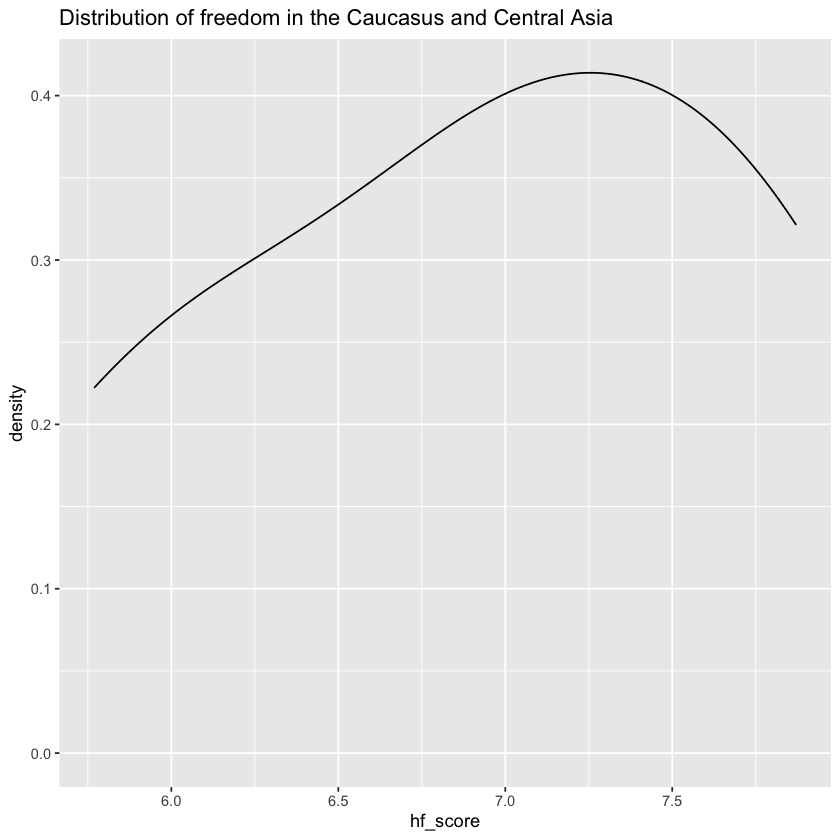

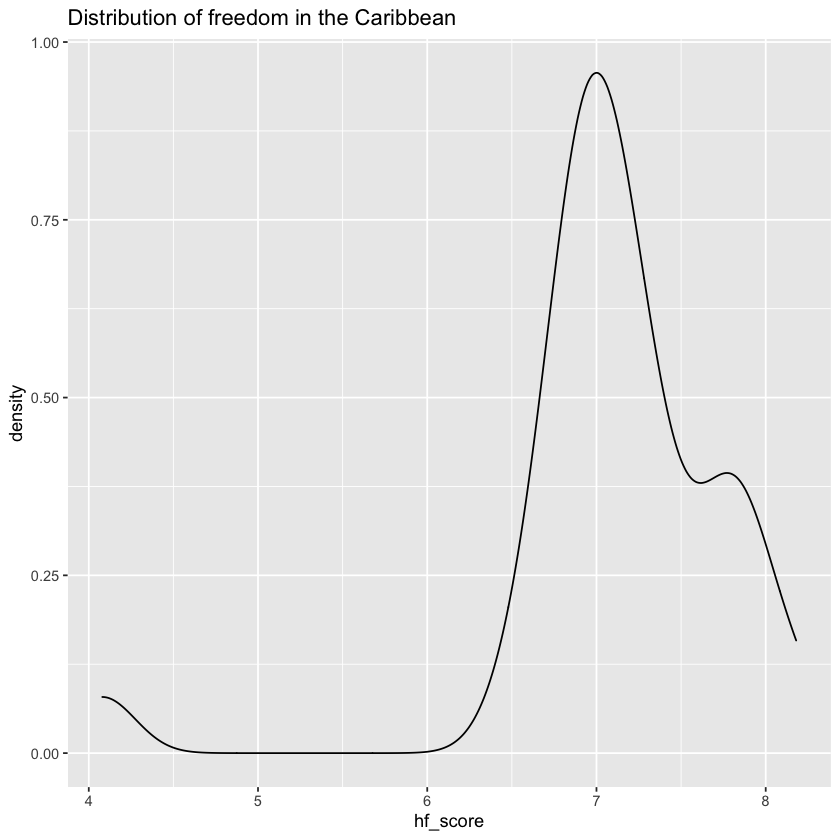

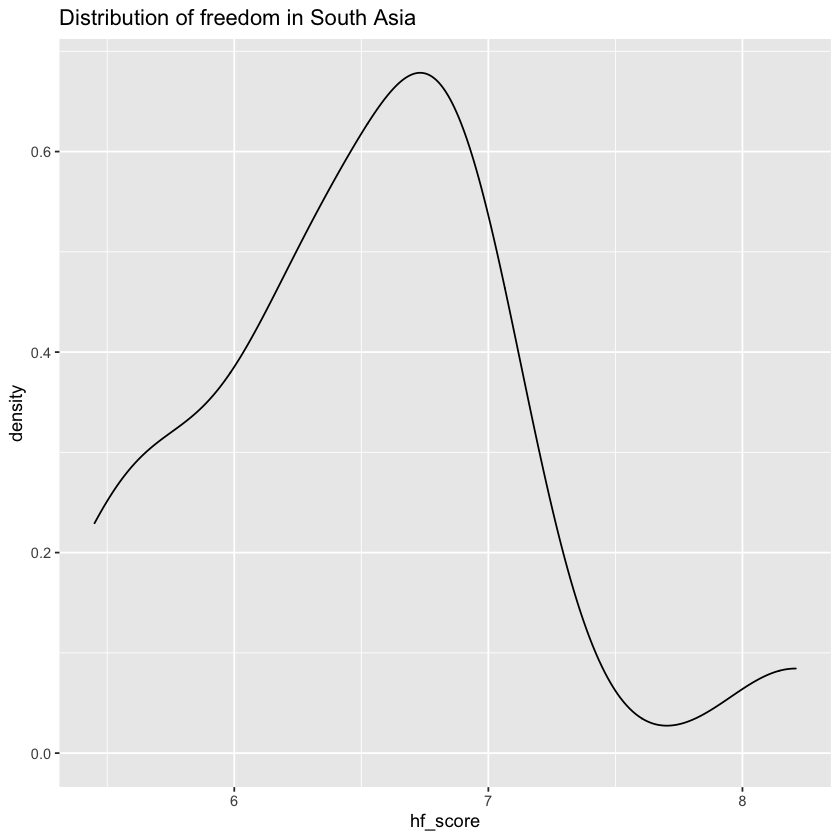

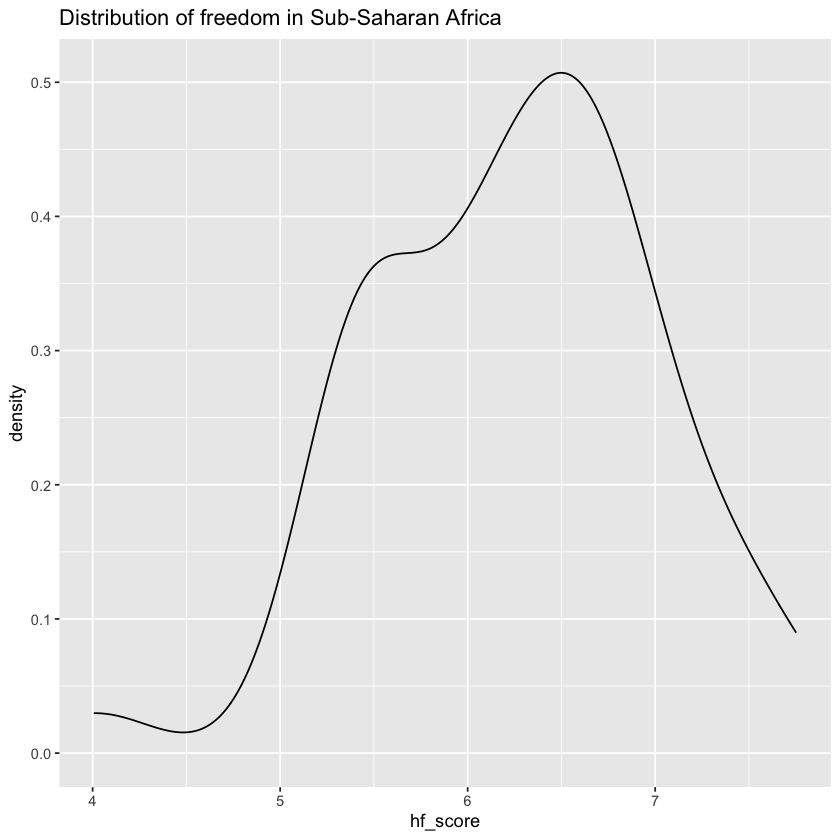

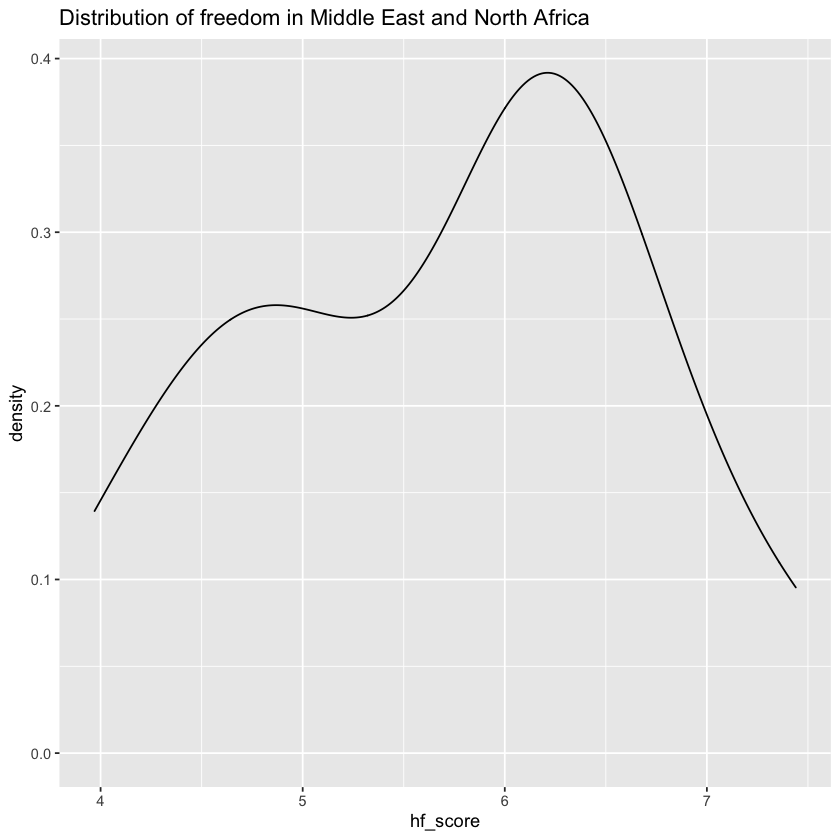

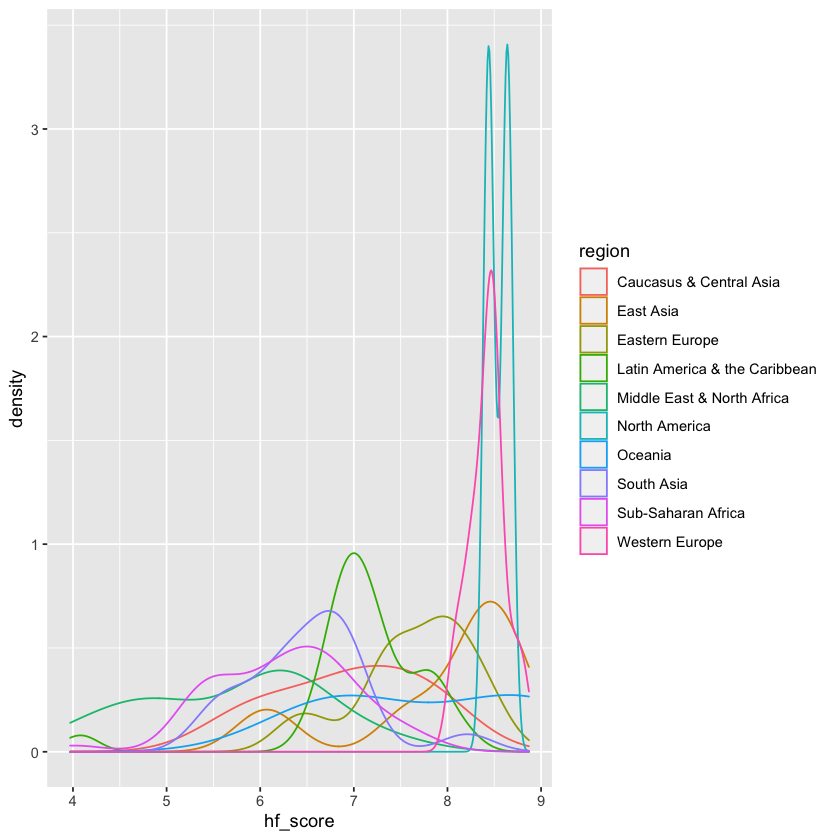

In [4]:
#extract only values for North America
HFI_NorthAmerica_2018 <- HFI_2018 %>% filter(region == "North America")
#plot histogram for variable "HF_score" for North America
HFI_distr_NorthAmerica_2018_p <- ggplot(HFI_NorthAmerica_2018, aes(x=hf_score)) + geom_density() + ggtitle("Distribution of freedom in North America")
HFI_distr_NorthAmerica_2018_p

#plot histogram for variable "HF_score" for Western Europe
HFI_WesternEurope_2018 <- HFI_2018 %>% filter(region == "Western Europe")
HFI_WesternEurope_2018_p <- ggplot(HFI_WesternEurope_2018, aes(x=hf_score)) + geom_density() + ggtitle("Distribution of freedom in Western Europe")
HFI_WesternEurope_2018_p

#plot histogram for variable "HF_score" for East Asia
HFI_EastAsia_2018 <- HFI_2018 %>% filter(region == "East Asia")
HFI_EastAsia_2018_p <- ggplot(HFI_EastAsia_2018, aes(x=hf_score)) + geom_density() + ggtitle("Distribution of freedom in East Asia")
HFI_EastAsia_2018_p

#plot histogram for variable "HF_score" for Oceania
HFI_Oceania_2018 <- HFI_2018 %>% filter(region == "Oceania")
HFI_Oceania_2018_p <- ggplot(HFI_Oceania_2018, aes(x=hf_score)) + geom_density() + ggtitle("Distribution of freedom in Oceania")
HFI_Oceania_2018_p

#plot histogram for variable "HF_score" for Eastern Europe
HFI_EastEu_2018 <- HFI_2018 %>% filter(region == "Eastern Europe")
HFI_EastEu_2018_p <- ggplot(HFI_EastEu_2018, aes(x=hf_score)) + geom_density() + ggtitle("Distribution of freedom in Eastern Europe")
HFI_EastEu_2018_p

#plot histogram for variable "HF_score" for Caucasus & Central Asia
HFI_CentAsia_2018 <- HFI_2018 %>% filter(region == "Caucasus & Central Asia")
HFI_CentAsia_2018_p <- ggplot(HFI_CentAsia_2018, aes(x=hf_score)) + geom_density() + ggtitle("Distribution of freedom in the Caucasus and Central Asia")
HFI_CentAsia_2018_p

#plot histogram for variable "HF_score" for Latin America & the Caribbean
HFI_LatinAmerica_2018 <- HFI_2018 %>% filter(region == "Latin America & the Caribbean")
HFI_LatinAmerica_2018_p <- ggplot(HFI_LatinAmerica_2018, aes(x=hf_score)) + geom_density() + ggtitle("Distribution of freedom in the Caribbean")
HFI_LatinAmerica_2018_p

#plot histogram for variable "HF_score" for South Asia
HFI_SouthAsia_2018 <- HFI_2018 %>% filter(region == "South Asia")
HFI_SouthAsia_2018_p <- ggplot(HFI_SouthAsia_2018, aes(x=hf_score)) + geom_density() + ggtitle("Distribution of freedom in South Asia")
HFI_SouthAsia_2018_p

#plot histogram for variable "HF_score" for Sub-Saharan Africa
HFI_SubSAfrica_2018 <- HFI_2018 %>% filter(region == "Sub-Saharan Africa")
HFI_SubSAfrica_2018_p <- ggplot(HFI_SubSAfrica_2018, aes(x=hf_score)) + geom_density() + ggtitle("Distribution of freedom in Sub-Saharan Africa")
HFI_SubSAfrica_2018_p

#plot histogram for variable "HF_score" for Middle East & North Africa
HFI_NorthAfrica_2018 <- HFI_2018 %>% filter(region == "Middle East & North Africa")
HFI_NorthAfrica_2018_p <- ggplot(HFI_NorthAfrica_2018, aes(x=hf_score)) + geom_density() + ggtitle("Distribution of freedom in Middle East and North Africa")
HFI_NorthAfrica_2018_p

#plot histograms for all regions and give each region their own color
HFI_2018_all <- ggplot(HFI_2018, aes(hf_score, color = region)) + geom_density()
HFI_2018_all

The plots above show how the distribution and the average values of HF in 2018 vary substantially depending on to the region we look at. This implies that the development of HF differs from region to region as well. 
Next, I will show how the HF scores of the entire world and then more specifically of different countries have developed over the past decade.

### 3.2 The Development of Freedom Since 2008

The plot below shows how the average of HF has changed from 2008-2018. We can see that overall, there seems to be a very slight decline in the average HF score since 2008. 
Next, I plotted this development for each region. The HF scores seem to have stayed rather stable since 2008 for most regions. Overall, the region of Middle East & North Africa seems to have seen the stongest decline in HF over the past decade. 
In order to take a closer look at the development of HF over time, I plotted the development of HF for each country in the different regions. This step shows very well that the average stability of the HF is not representative for many countries in various regions! In some regions, e.g. Sub-Saharan Africa, the span between highest and lowest HF score is very big, and many countries show either a steep decline (e.g., Venezuela or Syria) or a steep growth curve (e.g., Myanmar or Iceland) in HF between 2008-2018. If Iceland's steep growth curve surprises you: This can probably be explained by an increase of the economic freedom index stemming from lower "State Ownership of Assets"; the personal freedom index has been high and stable over time.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Removed 80 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 80 rows containing missing values (geom_point).”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 80 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 80 rows containing missing values (geom_point).”


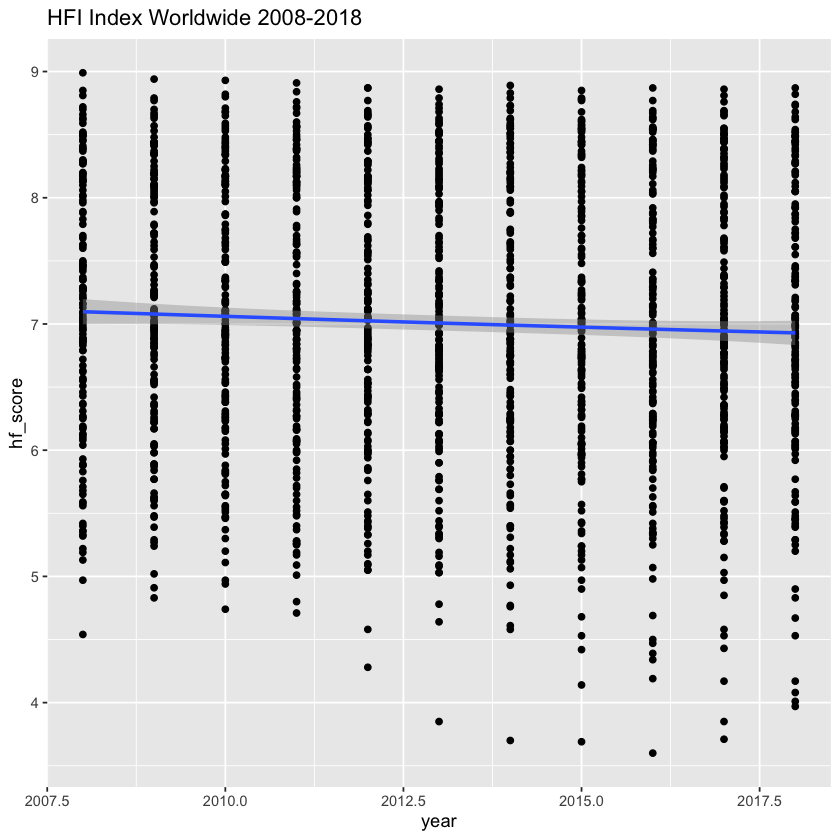

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



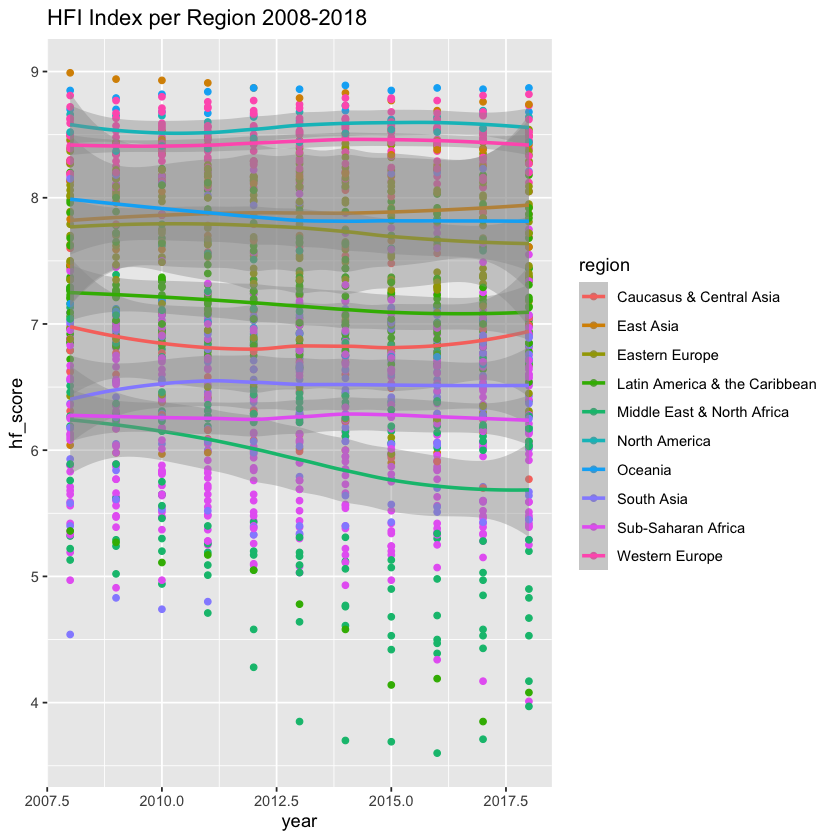

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



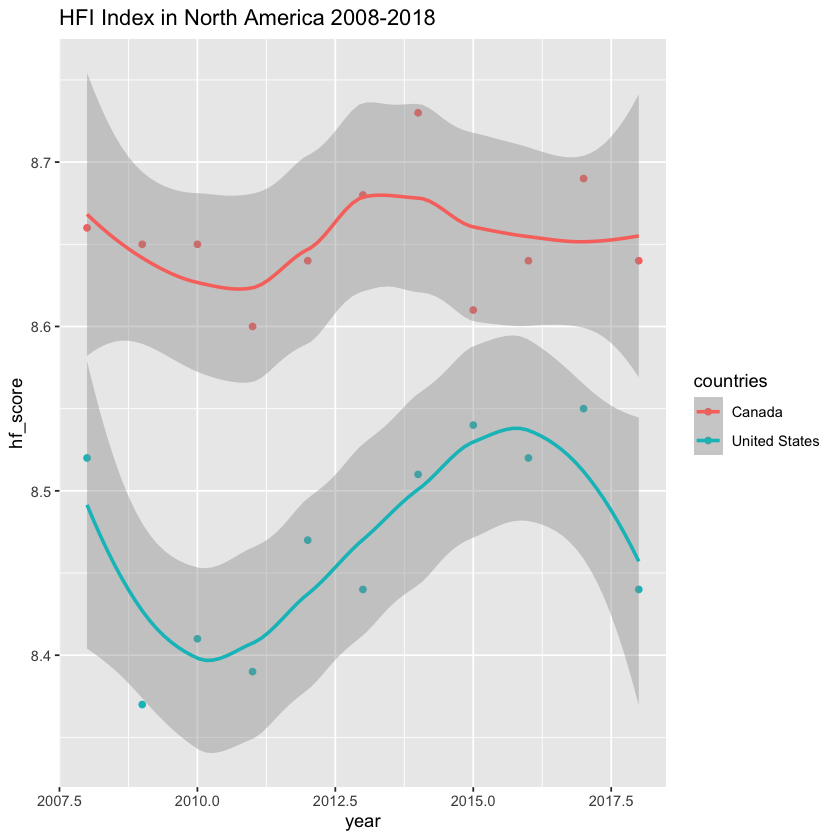

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



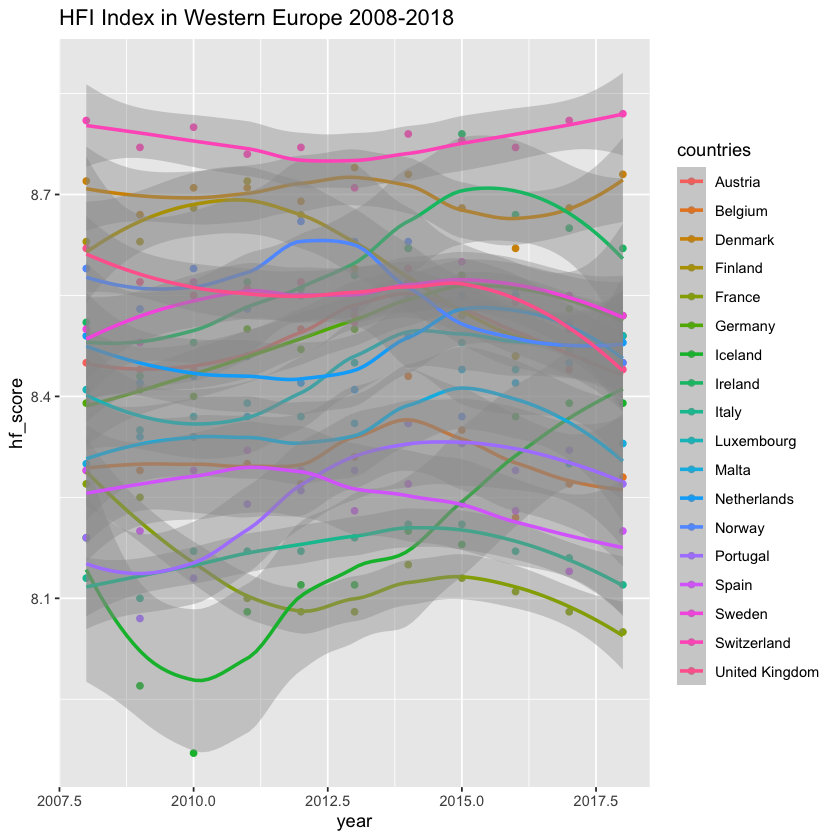

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



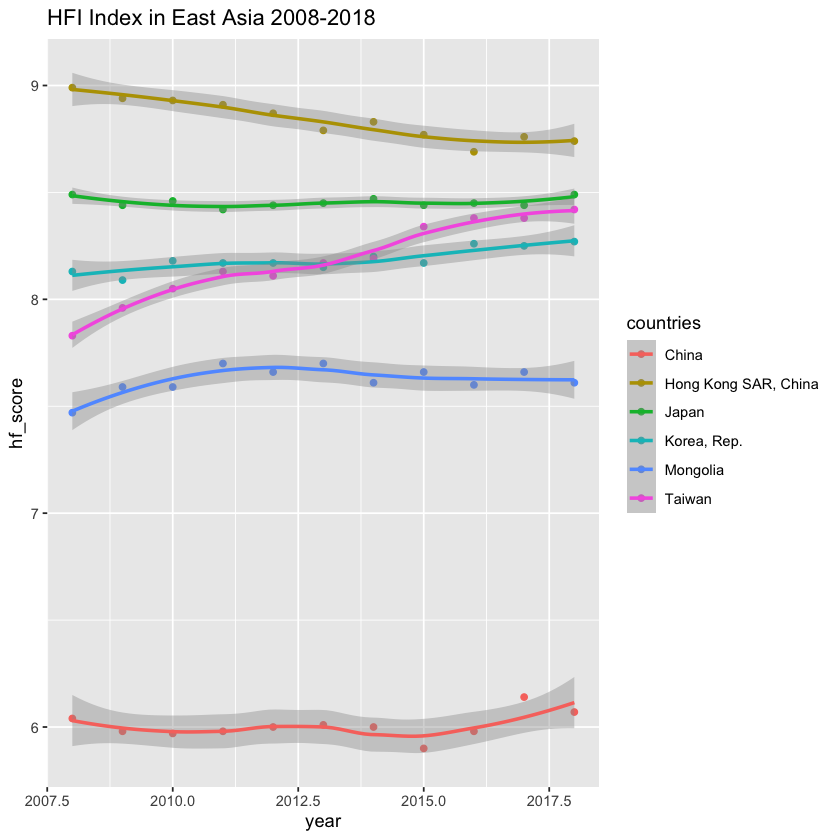

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 8 rows containing non-finite values (stat_smooth).”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 2016”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 1.01”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 1.0201”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“span too small.   fewer data v

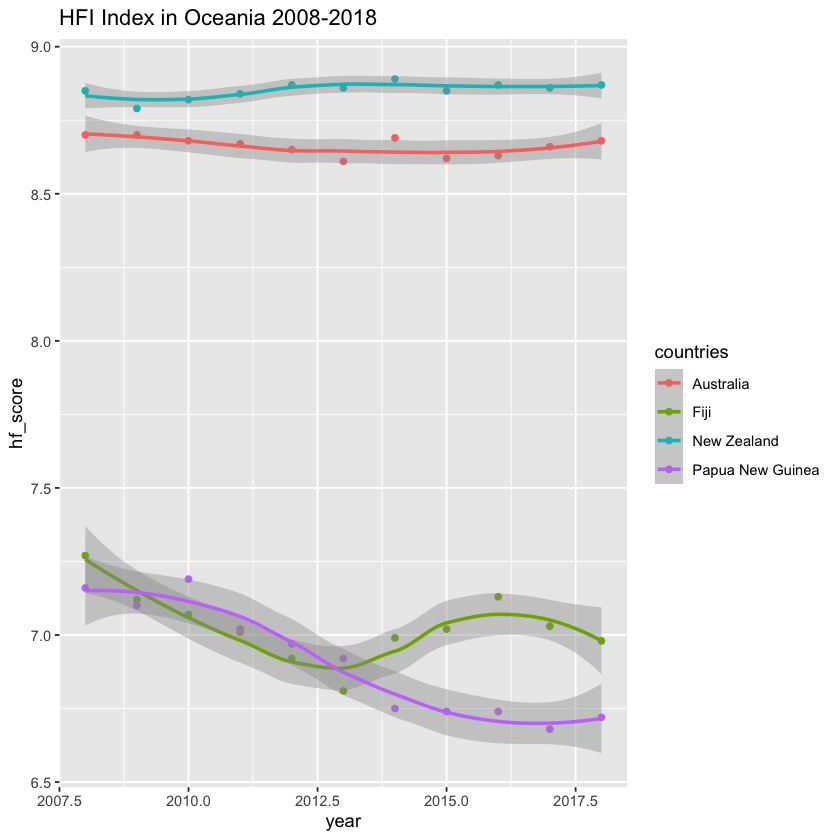

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


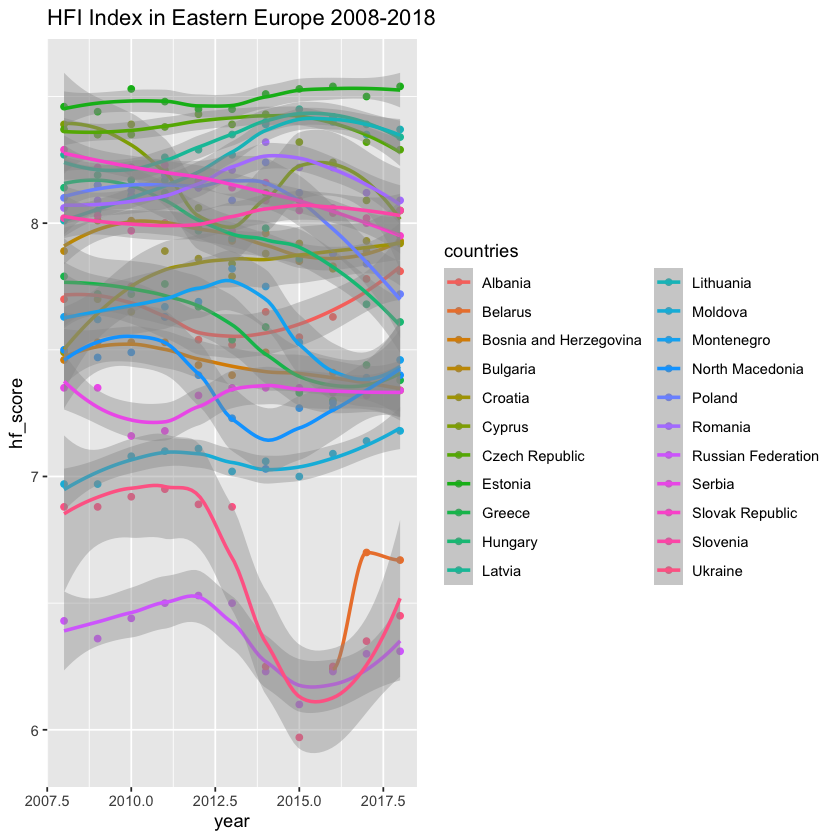

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


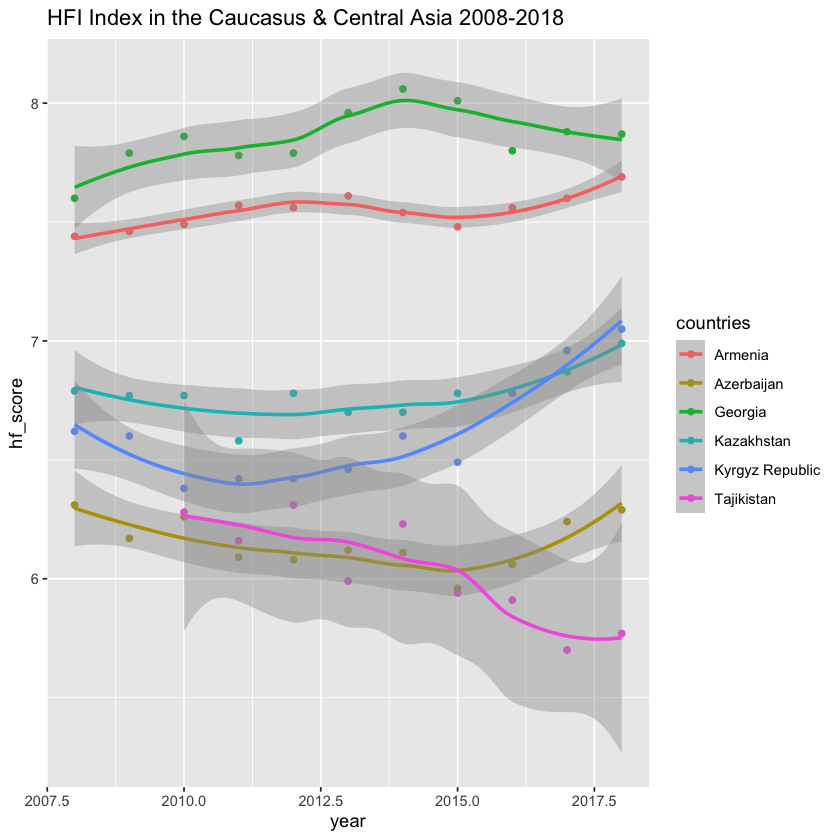

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 17 rows containing non-finite values (stat_smooth).”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warning message in sqrt(sum.squares/one.delta):
“NaNs wurden erzeugt”
Warning message in stats::qt(level/2 + 0.5, pred$df):
“NaNs wurden erzeugt”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 2014”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 2.02”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal co

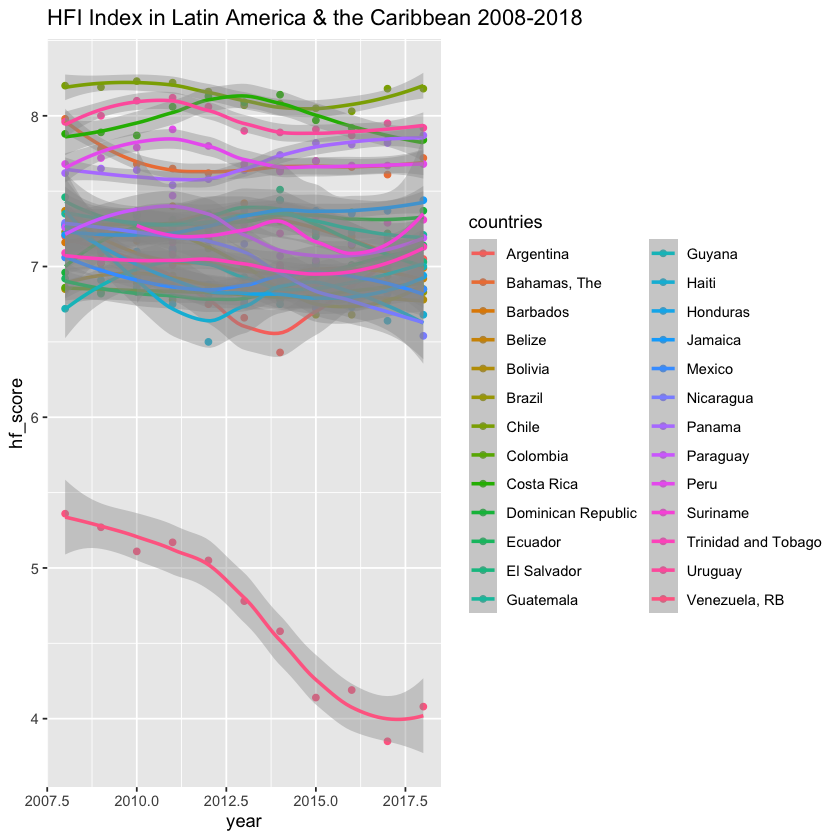

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 30 rows containing non-finite values (stat_smooth).”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“Chernobyl! trL>n 6”
Warning message in sqrt(sum.squares/one.delta):
“NaNs wurden erzeugt”
Warning message in stats::qt(level/2 + 0.5, pred$df):
“NaNs wurden erzeugt”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 2014”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 2.02”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal co

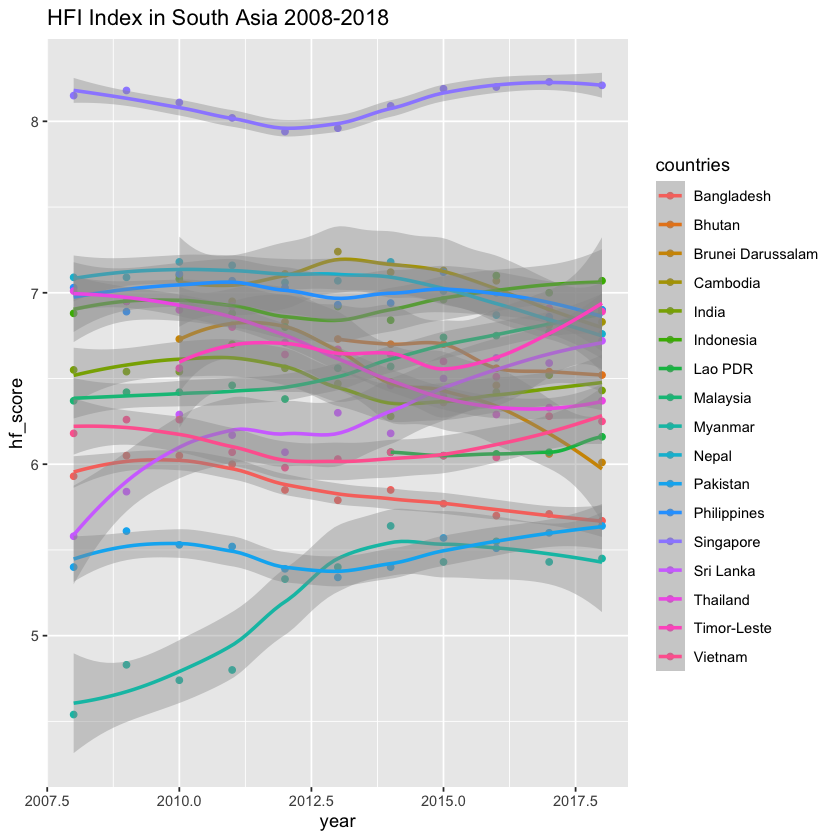

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 21 rows containing non-finite values (stat_smooth).”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 2016”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 1.01”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 1.0201”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“span too small.   fewer data 

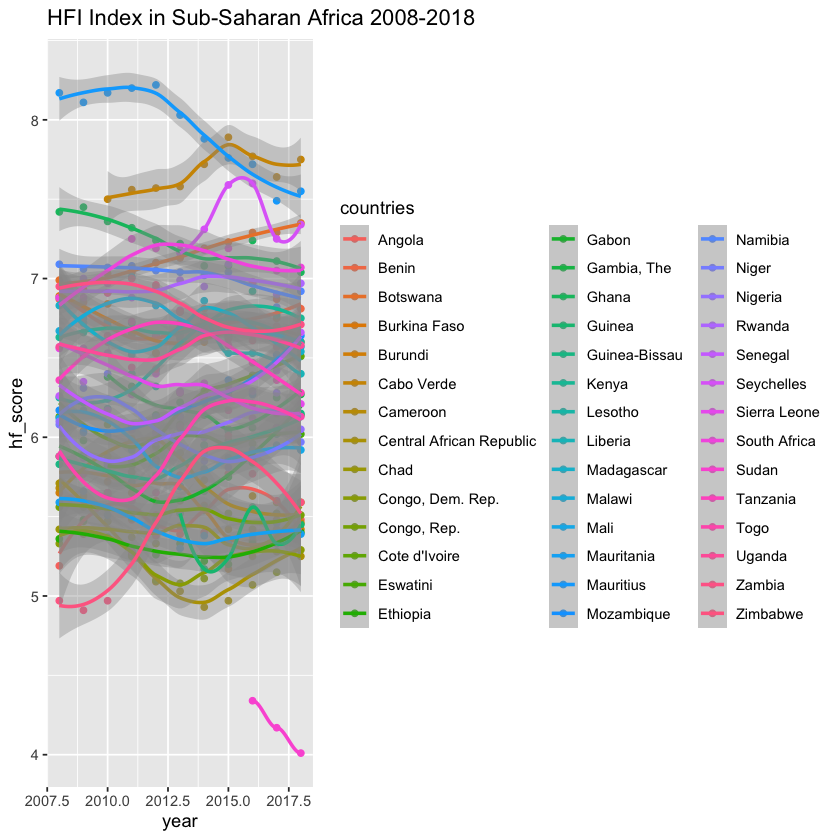

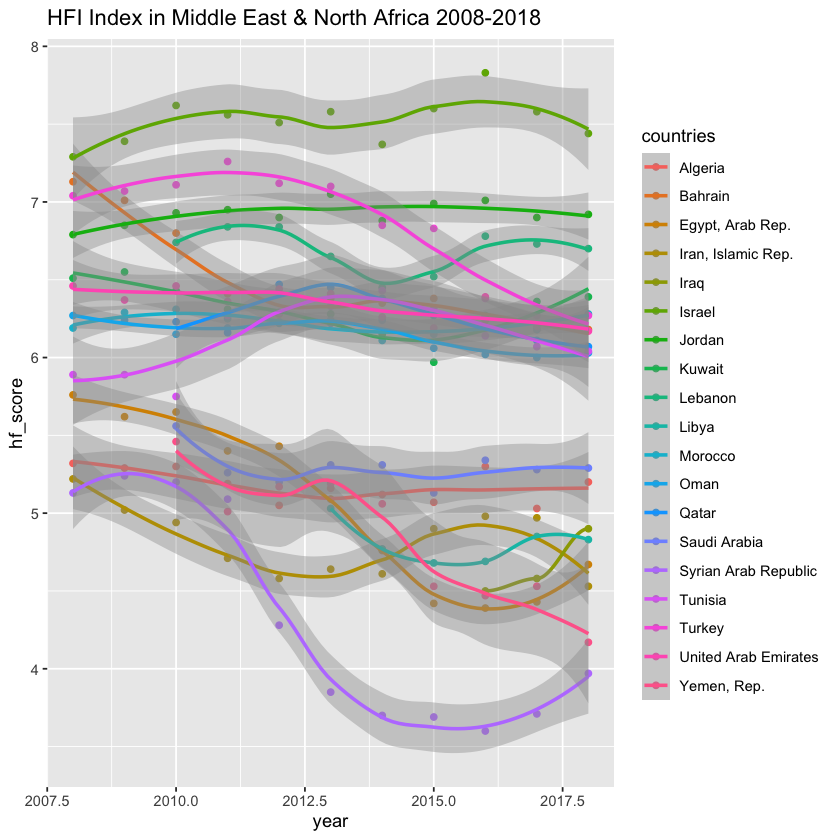

In [5]:
#plot correlation of hf_score with time 
HFI_development_world <- ggplot(HFI_raw, aes(year, hf_score)) + geom_point() + geom_smooth() + ggtitle("HFI Index Worldwide 2008-2018")
HFI_development_world

#plot regression of hf_score on time for each region
HFI_development_regions <- ggplot(HFI_raw, aes(year, hf_score, color = region)) + geom_point() + geom_smooth() + ggtitle("HFI Index per Region 2008-2018")
HFI_development_regions 
                                
#plot regression of hf_score on time for specific countries in the regions
HFI_NorthAmerica <- HFI_raw %>% filter(region == "North America")
HFI_dev_NorthAmerica <- ggplot(HFI_NorthAmerica, aes(year, hf_score, color = countries)) + geom_point() + geom_smooth() + ggtitle("HFI Index in North America 2008-2018")
HFI_dev_NorthAmerica

HFI_WesternEurope <- HFI_raw %>% filter(region == "Western Europe")
HFI_dev_WesternEurope <- ggplot(HFI_WesternEurope, aes(year, hf_score, color = countries)) + geom_point() + geom_smooth() + ggtitle("HFI Index in Western Europe 2008-2018")
HFI_dev_WesternEurope

HFI_EastAsia <- HFI_raw %>% filter(region == "East Asia")
HFI_dev_EastAsia <- ggplot(HFI_EastAsia, aes(year, hf_score, color = countries)) + geom_point() + geom_smooth() + ggtitle("HFI Index in East Asia 2008-2018")
HFI_dev_EastAsia

HFI_Oceania <- HFI_raw %>% filter(region == "Oceania")
HFI_dev_Oceania <- ggplot(HFI_Oceania, aes(year, hf_score, color = countries)) + geom_point() + geom_smooth() + ggtitle("HFI Index in Oceania 2008-2018")
HFI_dev_Oceania

HFI_EastEu <- HFI_raw %>% filter(region == "Eastern Europe")
HFI_dev_EastEu <- ggplot(HFI_EastEu, aes(year, hf_score, color = countries)) + geom_point() + geom_smooth() + ggtitle("HFI Index in Eastern Europe 2008-2018")
HFI_dev_EastEu

HFI_CentralAsia <- HFI_raw %>% filter(region == "Caucasus & Central Asia")
HFI_dev_CentralAsia <- ggplot(HFI_CentralAsia, aes(year, hf_score, color = countries)) + geom_point() + geom_smooth() + ggtitle("HFI Index in the Caucasus & Central Asia 2008-2018")
HFI_dev_CentralAsia

HFI_LatinAmerica <- HFI_raw %>% filter(region == "Latin America & the Caribbean")
HFI_dev_LatinAmerica <- ggplot(HFI_LatinAmerica, aes(year, hf_score, color = countries)) + geom_point() + geom_smooth() + ggtitle("HFI Index in Latin America & the Caribbean 2008-2018")
HFI_dev_LatinAmerica

HFI_SouthAsia <- HFI_raw %>% filter(region == "South Asia")
HFI_dev_SouthAsia <- ggplot(HFI_SouthAsia, aes(year, hf_score, color = countries)) + geom_point() + geom_smooth() + ggtitle("HFI Index in South Asia 2008-2018")
HFI_dev_SouthAsia

HFI_SubSAfrica <- HFI_raw %>% filter(region == "Sub-Saharan Africa")
HFI_dev_SubSAfrica <- ggplot(HFI_SubSAfrica, aes(year, hf_score, color = countries)) + geom_point() + geom_smooth() + ggtitle("HFI Index in Sub-Saharan Africa 2008-2018")
HFI_dev_SubSAfrica

HFI_NorthAfrica <- HFI_raw %>% filter(region == "Middle East & North Africa")
HFI_dev_NorthAfrica <- ggplot(HFI_NorthAfrica, aes(year, hf_score, color = countries)) + geom_point() + geom_smooth() + ggtitle("HFI Index in Middle East & North Africa 2008-2018")
HFI_dev_NorthAfrica


In order to put these developments into numbers, I will next fit a linear regression of year on HFI for four selected countries that have a steep slope in HF scores (Venezuela, Iceland, Myanmar, and Syria), and for one country that seems stable regarding HF (Japan). I will then compare the slopes for each country to find out which one has the steepest increase or decline.

In [6]:
#Extract HF scores for Venezuela
HFI_venezuela <- HFI_raw %>% filter(countries == "Venezuela, RB")
#Run a linear regression of year on HFI for Venezuela
lm_venezuela <- lm(HFI_venezuela$hf_score ~ HFI_venezuela$year) 
summary(lm_venezuela)

#Extract HF scores for Iceland
HFI_iceland <- HFI_raw %>% filter(countries == "Iceland")
#Run a linear regression of year on HFI for Iceland
lm_iceland <- lm(HFI_iceland$hf_score ~ HFI_iceland$year) 
summary(lm_iceland)

#Extract HF scores for Syria
HFI_syria <- HFI_raw %>% filter(countries == "Syrian Arab Republic")
#Run a linear regression of year on HFI for Syria
lm_syria <- lm(HFI_syria$hf_score ~ HFI_syria$year) 
summary(lm_syria)

#Extract HF scores for Myanmar
HFI_myanmar <- HFI_raw %>% filter(countries == "Myanmar")
#Run a linear regression of year on HFI for Myanmar
lm_myanmar <- lm(HFI_myanmar$hf_score ~ HFI_myanmar$year) 
summary(lm_myanmar)

#Extract HF scores for Japan
HFI_japan <- HFI_raw %>% filter(countries == "Japan")
#Run a linear regression of year on HFI for Japan
lm_japan <- lm(HFI_japan$hf_score ~ HFI_japan$year) 
summary(lm_japan)


Call:
lm(formula = HFI_venezuela$hf_score ~ HFI_venezuela$year)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.23327 -0.08573 -0.02536  0.12800  0.20300 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        322.56009   30.62975   10.53 2.32e-06 ***
HFI_venezuela$year  -0.15791    0.01522  -10.38 2.63e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1596 on 9 degrees of freedom
Multiple R-squared:  0.9229,	Adjusted R-squared:  0.9143 
F-statistic: 107.7 on 1 and 9 DF,  p-value: 2.626e-06



Call:
lm(formula = HFI_iceland$hf_score ~ HFI_iceland$year)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17927 -0.04482 -0.01036  0.03664  0.22182 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)   
(Intercept)      -73.44709   20.27773  -3.622  0.00555 **
HFI_iceland$year   0.04055    0.01007   4.025  0.00300 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1057 on 9 degrees of freedom
Multiple R-squared:  0.6429,	Adjusted R-squared:  0.6032 
F-statistic:  16.2 on 1 and 9 DF,  p-value: 0.002995



Call:
lm(formula = HFI_syria$hf_score ~ HFI_syria$year)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.46455 -0.23818 -0.09818  0.26591  0.56909 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    372.14455   70.47555   5.280 0.000507 ***
HFI_syria$year  -0.18273    0.03501  -5.219 0.000550 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3672 on 9 degrees of freedom
Multiple R-squared:  0.7517,	Adjusted R-squared:  0.7241 
F-statistic: 27.24 on 1 and 9 DF,  p-value: 0.0005497



Call:
lm(formula = HFI_myanmar$hf_score ~ HFI_myanmar$year)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.24227 -0.15977  0.03364  0.13114  0.34591 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -195.19045   40.21173  -4.854 0.000903 ***
HFI_myanmar$year    0.09955    0.01998   4.983 0.000756 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2095 on 9 degrees of freedom
Multiple R-squared:  0.734,	Adjusted R-squared:  0.7044 
F-statistic: 24.83 on 1 and 9 DF,  p-value: 0.0007561



Call:
lm(formula = HFI_japan$hf_score ~ HFI_japan$year)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.032909 -0.013818 -0.004727  0.011727  0.038182 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)
(Intercept)    7.7216364  4.4509160   1.735    0.117
HFI_japan$year 0.0003636  0.0022111   0.164    0.873

Residual standard error: 0.02319 on 9 degrees of freedom
Multiple R-squared:  0.002996,	Adjusted R-squared:  -0.1078 
F-statistic: 0.02705 on 1 and 9 DF,  p-value: 0.873


The outputs show that out of the five countries I ran the lm for, the country with the steepest slope is Syria. It has a slope of -.18, which means that in our model, Syria's score goes down by .18 points on the HF scale. We can also see that the R squared is .75, which means that the lm explains about 75% of the variance in the HF score. Venezuela has the second-steepest slope of -.15. Here, the R squared at .92 is higher than for the lm for Syria, which means that the lm can explain about 90% of the variance. This is probably because the regression line this case is closer to linear compared to Syria, which has non-linear tails. Below, I log transformed the values for Syria and ran the model again, which did not yield a better fit.
Both Iceland and Myanmar show small positive effects of year on HF score (0.04 and 0.1, respectively), both models are significant.
As expected for Japan, the year does not influence the HF score - the slope value is very small, and the p-value is not significant anyway. Additionally, we can see that the R squared is very low, too, which means that year does not explain changes in HF score.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'




Call:
lm(formula = log(HFI_syria$hf_score) ~ HFI_syria$year)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.10230 -0.05357 -0.02231  0.05719  0.13544 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    84.806022  16.108729   5.265 0.000518 ***
HFI_syria$year -0.041409   0.008002  -5.175 0.000584 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.08393 on 9 degrees of freedom
Multiple R-squared:  0.7484,	Adjusted R-squared:  0.7205 
F-statistic: 26.78 on 1 and 9 DF,  p-value: 0.0005836


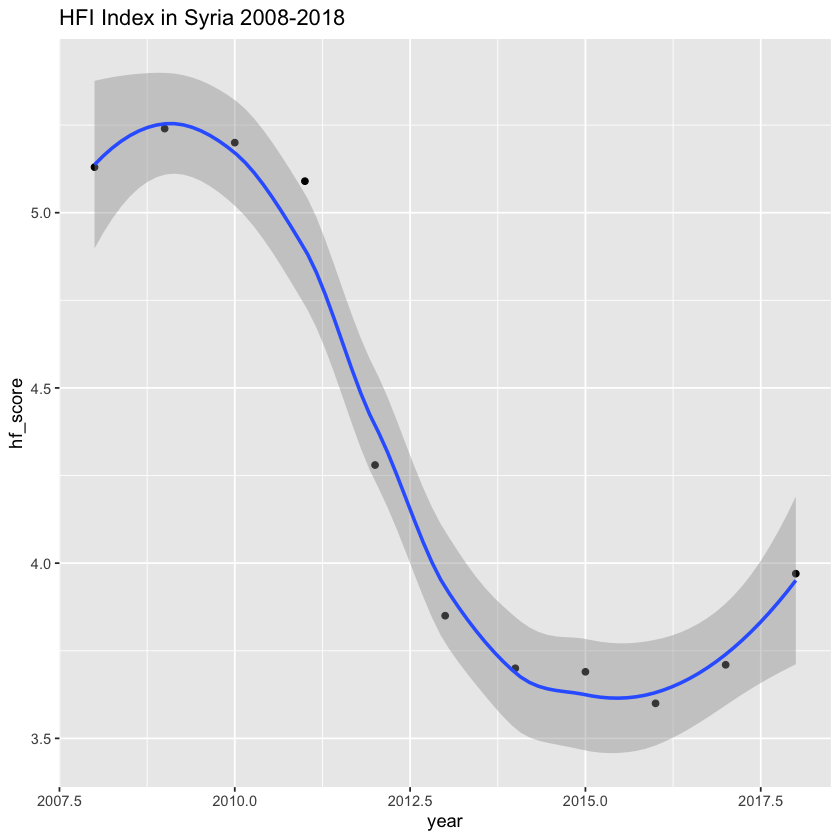

In [7]:
#plot regression line for Syria to look at it more closely
HFI_dev_Syria <- ggplot(HFI_syria, aes(year, hf_score)) + geom_point() + geom_smooth() + ggtitle("HFI Index in Syria 2008-2018")
HFI_dev_Syria

#run the lm with log-transformed hfi scores to see if it fits better
lm_syria_log <- lm(log(HFI_syria$hf_score) ~ HFI_syria$year) 
summary(lm_syria_log)

Log-transforming did not improve the fit of the model. If anything, the R squared is now slightly lower! I will now run a multiple linear regression to show that added predictors about the safety of citizens and the economic conditions can help explain the HF scores for Syria better.

In [45]:
#create nested models predicting Syria's HF score
syria_fit1 <- lm(hf_score ~ year + pf_ss, data=HFI_syria)
syria_fit2 <- lm(hf_score ~ year + pf_ss + ef_government, data=HFI_syria)
syria_fit3 <- lm(hf_score ~ pf_ss + ef_government , data=HFI_syria)
syria_fit4 <- lm(hf_score ~ pf_ss, data=HFI_syria)

summary(syria_fit1)
summary(syria_fit2)
summary(syria_fit3)
summary(syria_fit4)


Call:
lm(formula = hf_score ~ year + pf_ss, data = HFI_syria)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18418 -0.10727 -0.04863  0.06329  0.44515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) 37.03767   82.40663   0.449  0.66503   
year        -0.01746    0.04071  -0.429  0.67935   
pf_ss        0.41130    0.08907   4.618  0.00172 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2034 on 8 degrees of freedom
Multiple R-squared:  0.9322,	Adjusted R-squared:  0.9153 
F-statistic: 55.04 on 2 and 8 DF,  p-value: 2.107e-05



Call:
lm(formula = hf_score ~ year + pf_ss + ef_government, data = HFI_syria)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17298 -0.08104 -0.03358  0.07594  0.25107 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)   -25.21288   66.41145  -0.380  0.71546   
year            0.01485    0.03302   0.450  0.66653   
pf_ss           0.36436    0.06945   5.246  0.00119 **
ef_government  -0.40205    0.15124  -2.658  0.03255 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1534 on 7 degrees of freedom
Multiple R-squared:  0.9663,	Adjusted R-squared:  0.9518 
F-statistic: 66.87 on 3 and 7 DF,  p-value: 1.617e-05



Call:
lm(formula = hf_score ~ pf_ss + ef_government, data = HFI_syria)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17794 -0.08653 -0.03145  0.09461  0.25522 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    4.64731    1.05994   4.385  0.00233 ** 
pf_ss          0.34259    0.04725   7.250 8.81e-05 ***
ef_government -0.37702    0.13343  -2.826  0.02230 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1456 on 8 degrees of freedom
Multiple R-squared:  0.9653,	Adjusted R-squared:  0.9566 
F-statistic: 111.3 on 2 and 8 DF,  p-value: 1.448e-06



Call:
lm(formula = hf_score ~ pf_ss, data = HFI_syria)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18877 -0.10232 -0.07877  0.07674  0.45594 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.69779    0.24511   6.927 6.86e-05 ***
pf_ss        0.44489    0.04047  10.993 1.62e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.194 on 9 degrees of freedom
Multiple R-squared:  0.9307,	Adjusted R-squared:  0.923 
F-statistic: 120.9 on 1 and 9 DF,  p-value: 1.618e-06


The outputs show that instead of year, a combination of the predictors pf_ss (meaning security and safety) and ef_government (meaning government consumption spending as a percentage of total consumption) can explain the HFI for Syria best, with an adjusted R squared of .96. 

### 3.3 A Closer Look at Female-Specific Freedoms

Now that I have looked into the development of HF scores over different regions and countries, I would like to take a closer look at female-specific freedom. It should be mentioned here that the women-specific measure has been aggregated from way less and also not corresponding variables compared to the HFI (the five indicators were female genital mutilation, equal inheritance rights, women’s freedom of movement, female-to-female relationships, and divorce) than the HFI. 
I hypothesize that the average of the female-specific HF score is lower than the aggregated one for both genders in some countries with a generally low HFI. I test this below: 

In [8]:
#run t-test to test for significant difference between average HFI worldwide (all genders) in 2018 and female-specific freedom index in 2018
t.test(HFI_2018$hf_score, HFI_2018$womens_freedom)

#filter for countries with the lowest 20 ranks in 2018 
HFI_2018_lowest <- HFI_2018 %>% filter(hf_rank > 142) 

#run t-test to test for significant difference between average HFI of the lowest-ranked countries in 2018 and their female-specific freedom index in 2018
t.test(HFI_2018_lowest$hf_score, HFI_2018_lowest$womens_freedom)

#filter for countries with the highest 20 ranks in 2018 
HFI_2018_highest <- HFI_2018 %>% filter(hf_rank < 21)
#run t-test to test for significant difference between average HFI of the highest-ranked countries in 2018 and their female-specific freedom index in 2018
t.test(HFI_2018_highest$hf_score, HFI_2018_highest$womens_freedom)


	Welch Two Sample t-test

data:  HFI_2018$hf_score and HFI_2018$womens_freedom
t = -5.4065, df = 230.85, p-value = 1.601e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.4974216 -0.6975166
sample estimates:
mean of x mean of y 
 6.933025  8.030494 



	Welch Two Sample t-test

data:  HFI_2018_lowest$hf_score and HFI_2018_lowest$womens_freedom
t = -0.24685, df = 20.37, p-value = 0.8075
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.543503  1.216503
sample estimates:
mean of x mean of y 
   4.9875    5.1510 



	Welch Two Sample t-test

data:  HFI_2018_highest$hf_score and HFI_2018_highest$womens_freedom
t = -22.806, df = 31.644, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.486968 -1.243032
sample estimates:
mean of x mean of y 
    8.561     9.926 


The outputs above show us that this is a great example for the infamous "apples & oranges" comparison and thus should be interpreted very cautiously. 
On average for all countries, there is a significant difference between the average HF score for all genders compared to the women-specific score. While worldwide, the average HF score in 2018 was 6.93, the average women-specific rating was 8.03. For the 20 lowest-ranked country, there was no significant difference between the two indices (p-value is > .5). For the 20 highest-ranked countries, there was again a significant difference with the mean HF score being 8.5 and the mean women-specific score being 9.9. Technically, the hypothesis should be rejected based on this data.
However, this does NOT mean that women have more freedom than men, it just means that the indicators for the women-specific index had a way lower bar than the ones measuring human freedom. It is (thankfully) easier for a country in 2018 to get the full score for not cutting parts of people's genitals off than for low taxes on international trade, and the HFI is aggregated from more of the latter kind of variables. 

### 3.4 The Relationship between Personal Freedom and Economic Freedom 
After seeing that the subtleties of the varibales that flow into the HFI matter, I want to look into the two main factors whose average determine the HFI: Personal Freedom and Economic Freedom. 
As a start, I will use Pearson's product-moment correlation to test the (obvious) hypothesis there is a significant correlation between these two variables PF and EF. 

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Removed 80 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 80 rows containing missing values (geom_point).”
`geom_smooth()` using method = 'loess' and formula 'y ~ x'



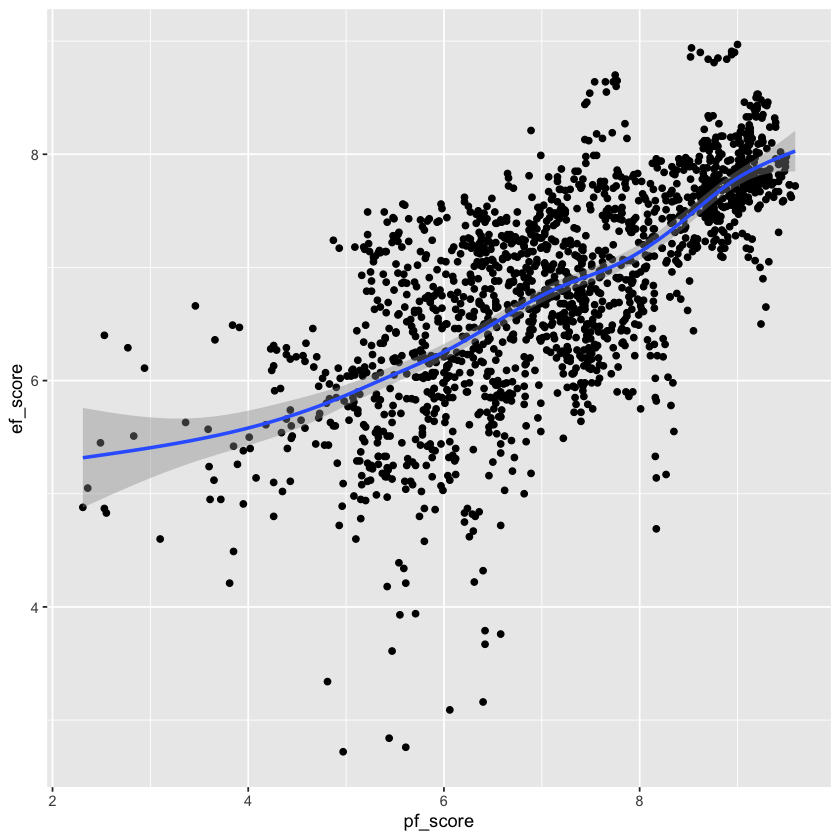


	Pearson's product-moment correlation

data:  pf_score and ef_score
t = 39.936, df = 1700, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.670381 0.719465
sample estimates:
      cor 
0.6957343 



	Pearson's product-moment correlation

data:  pf_score and ef_score
t = 12.829, df = 160, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6266826 0.7805611
sample estimates:
      cor 
0.7120696 



	Spearman's rank correlation rho

data:  pf_score and ef_score
S = 200107, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.7175866 


Warning message:
“Removed 80 rows containing missing values (geom_point).”


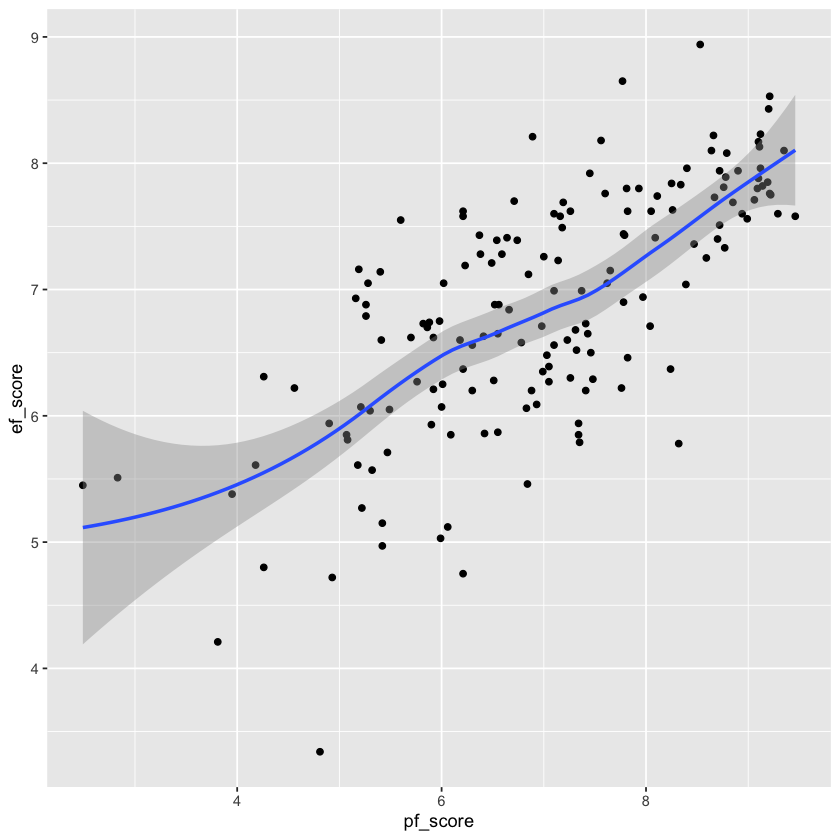

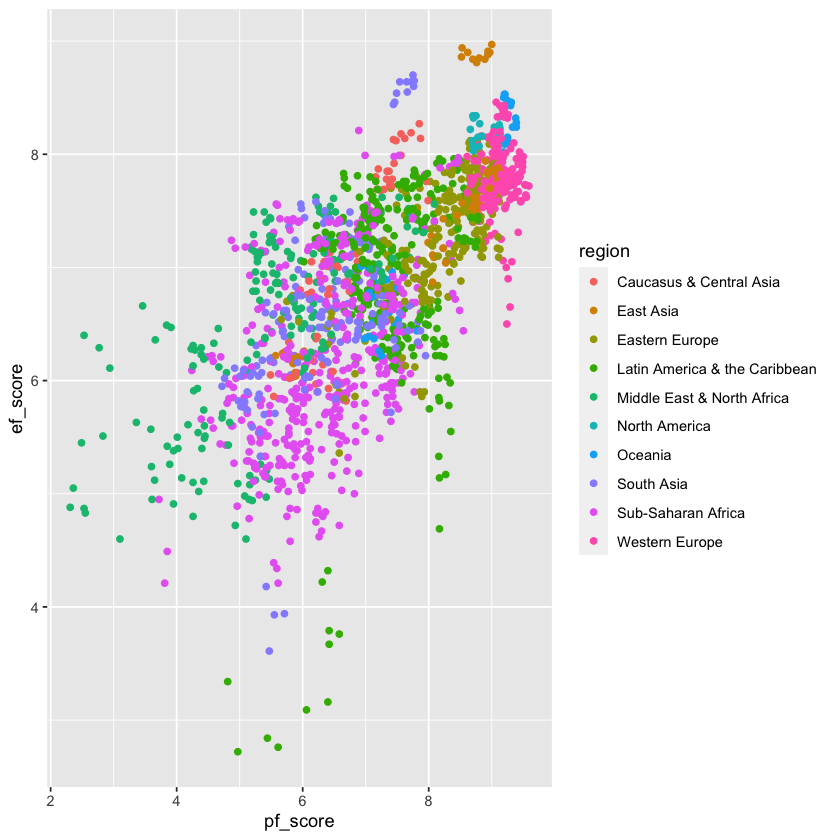

In [9]:
#look at plot to see what the correlation of ef and pf looks like over all years and in 2018 
cor_efpf_plot <- ggplot(HFI_raw, aes(pf_score, ef_score)) + geom_point() + geom_smooth() 
cor_efpf_plot_2018 <- ggplot(HFI_2018, aes(pf_score, ef_score)) + geom_point() + geom_smooth() 
cor_efpf_plot
cor_efpf_plot_2018

#apply Pearson's product-moment correlation to find out if there is a significant correlation between PF and EF over all years
cor.test(~ pf_score + ef_score, data=HFI_raw)

#repeat for the newest sample 2018
cor.test(~ pf_score + ef_score, data=HFI_2018)

#do the dame with Spearman to check for differences because it does not exactly look like a linear correlation
cor.test(~ pf_score + ef_score, data=HFI_2018, method= "spearman", exact=FALSE)

#make a plot for all years to check if this relationship differs between regions
cor_efpf_regions <- ggplot(HFI_raw, aes(pf_score, ef_score,  color = region)) + geom_point()  
cor_efpf_regions

The scatterplot for all countries shows a positive correlation between the EF and the PF score. The outputs show that PF and EF are significantly (p < .05) positively correlated with a correlation coefficient of around .7. This means that countries with higher personal freedom score tend to have a higher economic freedom score.

The scatterplot with different regions shows that depending on the region, the relationship of these two variables differs a lot and that regions build clusters in the plot. 
Below, I plotted the correlation of EF and PF for various regions and then for three different groups of countries: The highest, mid-range, and lowest-scoring in HFI. We can see that depending on the HFI score, the correlation between EF and PF differs: In the low range, there seems to be no correlation, while in the top 20 an in the mid-range, the correlation seems to be negative (higher PF correlated with lower EF). Maybe this shows that states that provide their citizens high personal freedom and security also regulate their markets more?

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



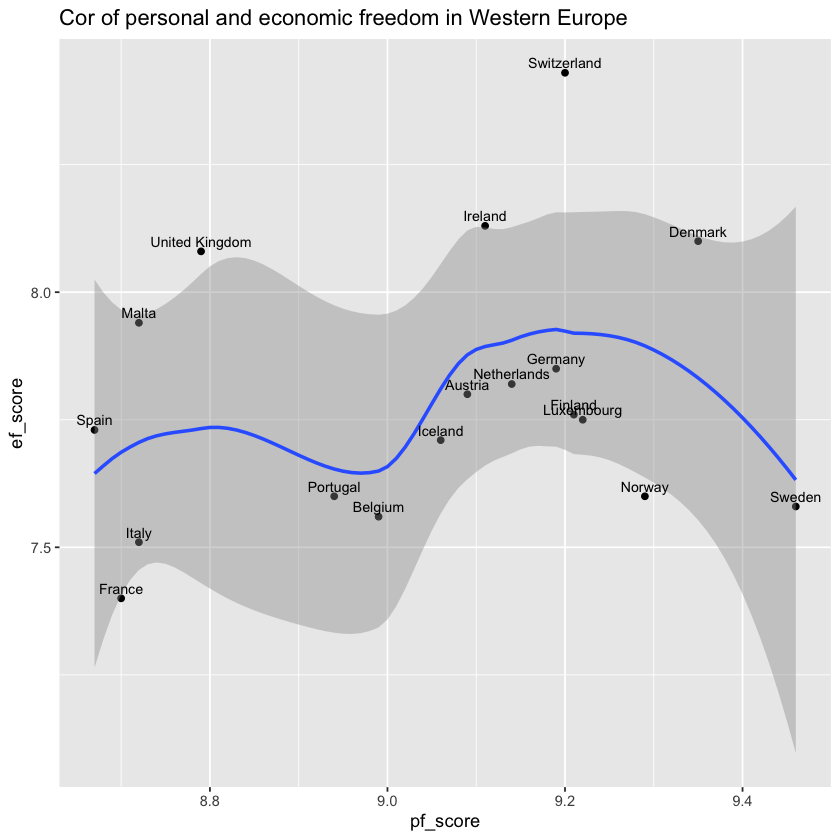

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



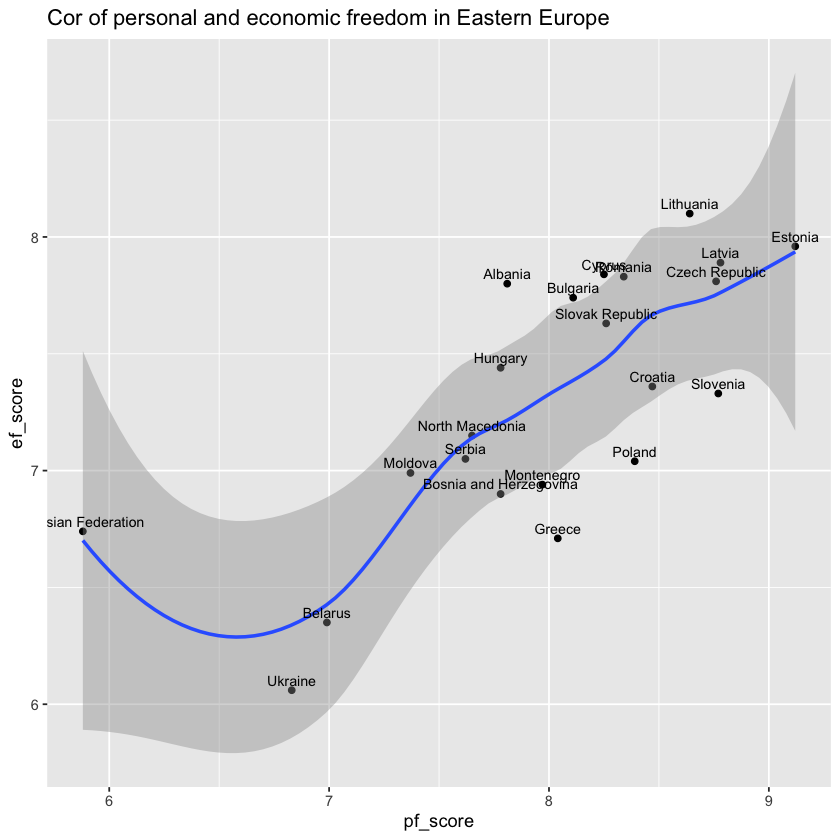

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



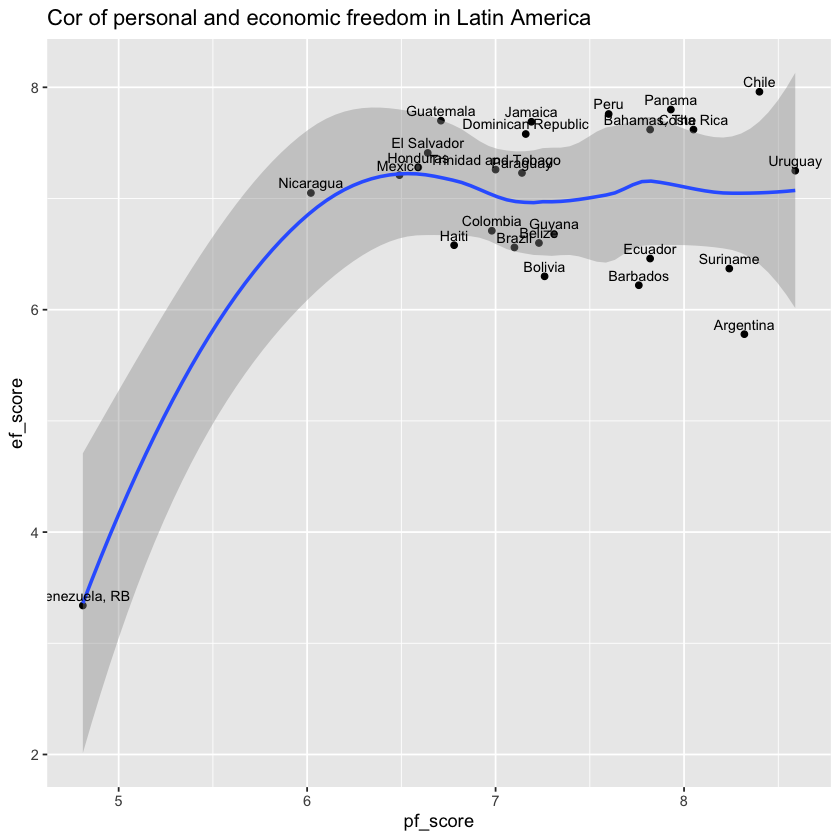

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



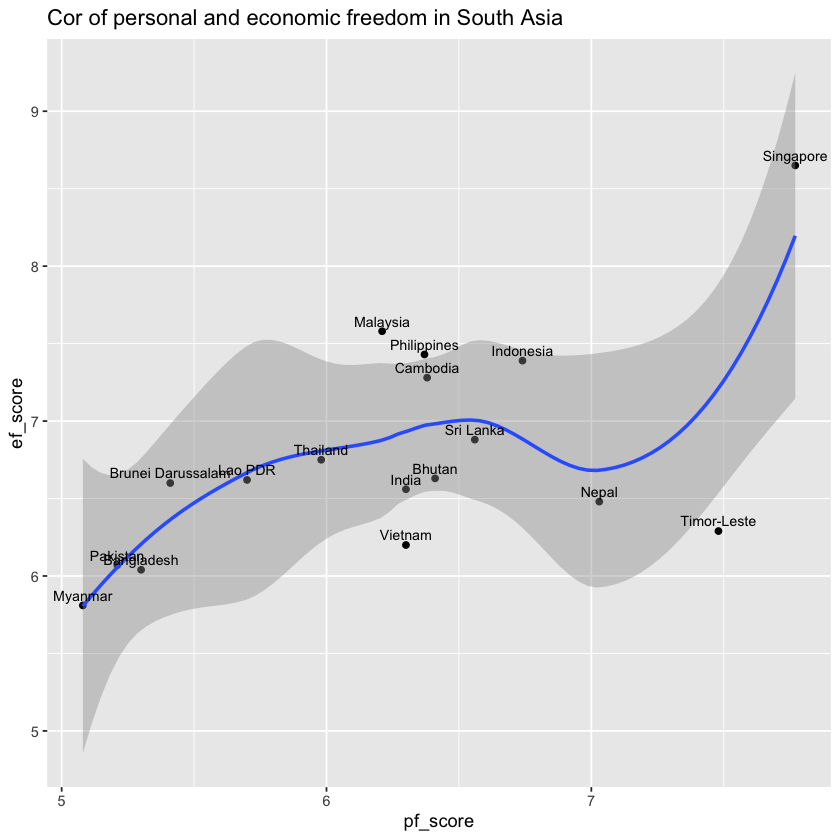

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



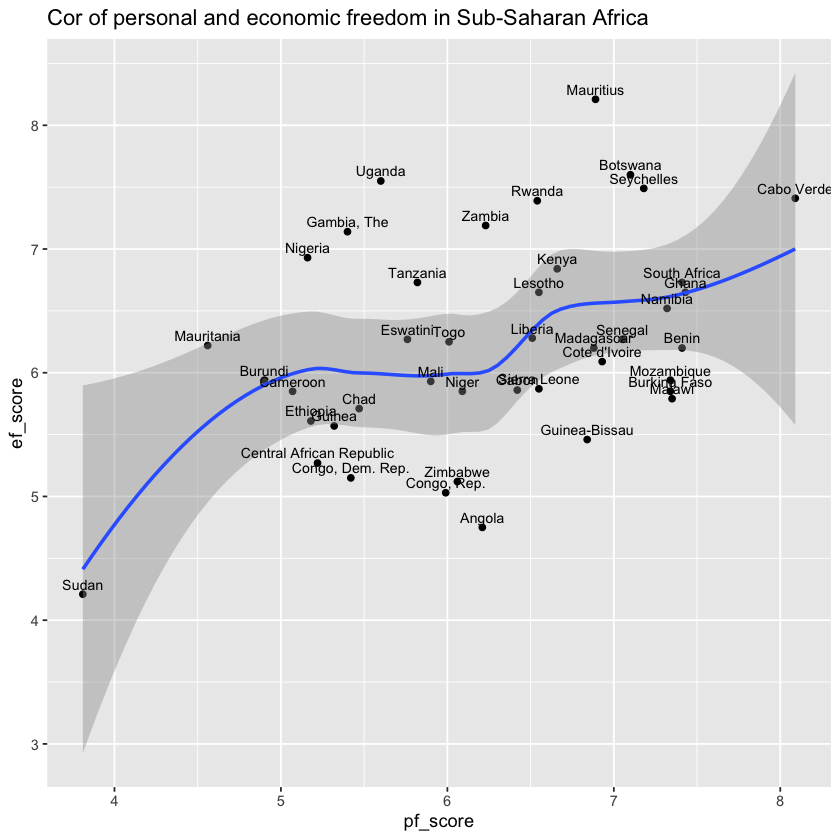

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



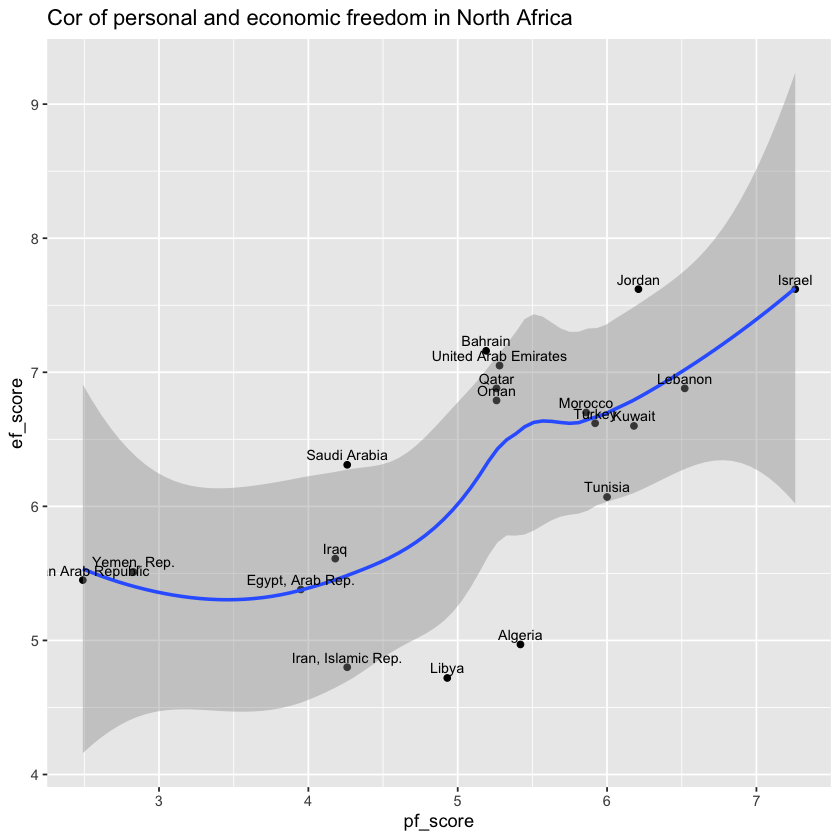

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



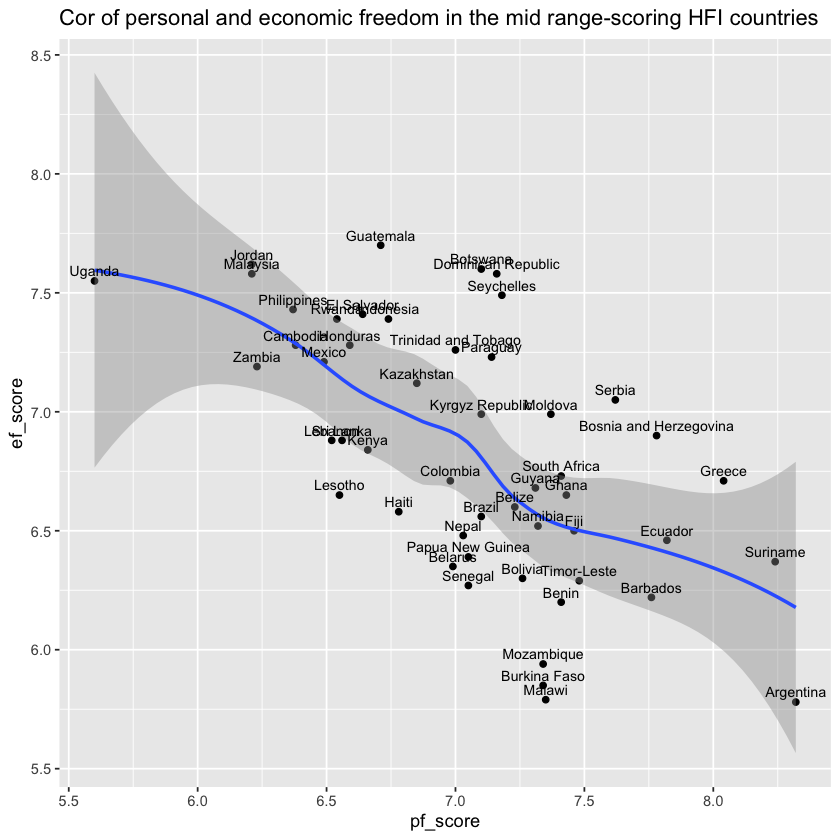

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



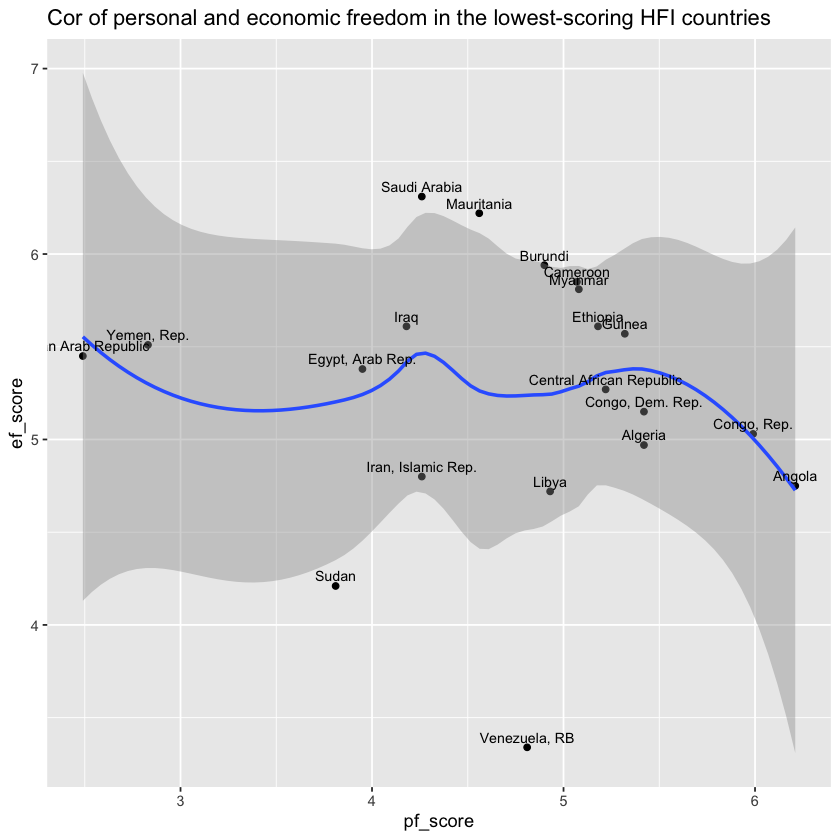

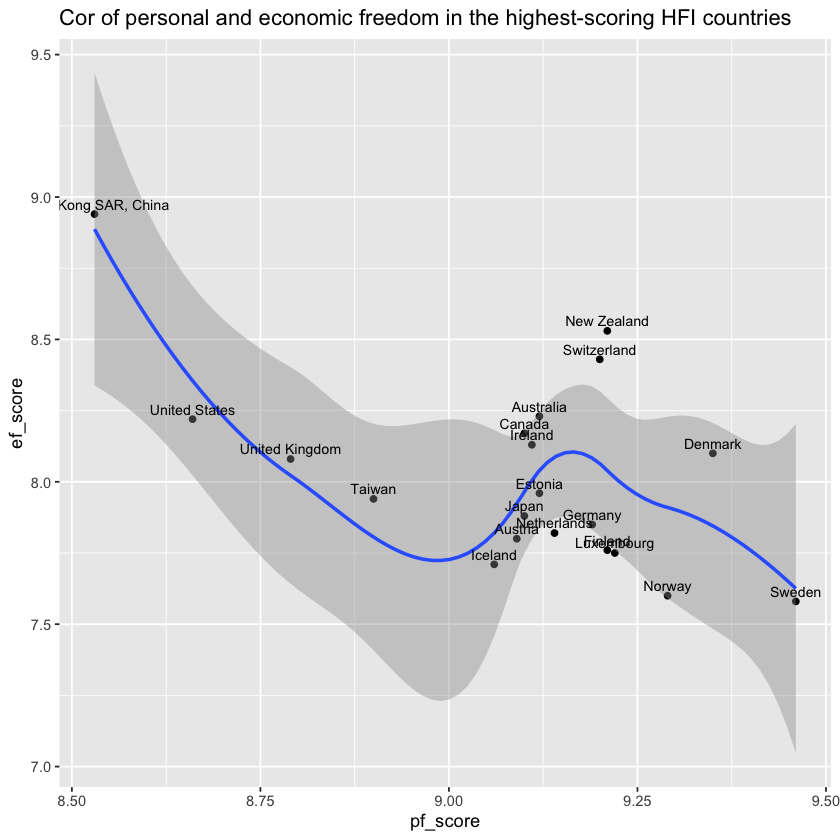

In [10]:
#make some regional plots for regions with enough datapoint
cor_efpf_HFI_WesternEurope <- ggplot(HFI_WesternEurope_2018, aes(pf_score, ef_score, rm.na = TRUE))  + geom_point() + geom_smooth() + geom_text(aes(label=countries), vjust = -0.5, size=3) + ggtitle("Cor of personal and economic freedom in Western Europe")
cor_efpf_HFI_WesternEurope

cor_efpf_HFI_EastEu_2018 <- ggplot(HFI_EastEu_2018, aes(pf_score, ef_score, rm.na = TRUE))  + geom_point() + geom_smooth() + geom_text(aes(label=countries), vjust = -0.5, size=3) + ggtitle("Cor of personal and economic freedom in Eastern Europe")
cor_efpf_HFI_EastEu_2018

cor_efpf_HFI_LatinAmerica_2018 <- ggplot(HFI_LatinAmerica_2018, aes(pf_score, ef_score, rm.na = TRUE))  + geom_point() + geom_smooth() + geom_text(aes(label=countries), vjust = -0.5, size=3) + ggtitle("Cor of personal and economic freedom in Latin America")
cor_efpf_HFI_LatinAmerica_2018

cor_efpf_HFI_SouthAsia_2018 <- ggplot(HFI_SouthAsia_2018, aes(pf_score, ef_score, rm.na = TRUE))  + geom_point() + geom_smooth() + geom_text(aes(label=countries), vjust = -0.5, size=3) + ggtitle("Cor of personal and economic freedom in South Asia")
cor_efpf_HFI_SouthAsia_2018

cor_efpf_HFI_SubSAfrica_2018 <- ggplot(HFI_SubSAfrica_2018, aes(pf_score, ef_score, rm.na = TRUE))  + geom_point() + geom_smooth() + geom_text(aes(label=countries), vjust = -0.5, size=3) + ggtitle("Cor of personal and economic freedom in Sub-Saharan Africa")
cor_efpf_HFI_SubSAfrica_2018

cor_efpf_HFI_NorthAfrica_2018 <- ggplot(HFI_NorthAfrica_2018, aes(pf_score, ef_score, rm.na = TRUE))  + geom_point() + geom_smooth() + geom_text(aes(label=countries), vjust = -0.5, size=3) + ggtitle("Cor of personal and economic freedom in North Africa")
cor_efpf_HFI_NorthAfrica_2018

#filter for countries with the middle 50 ranks in 2018 
HFI_2018_middlerange <- HFI_2018 %>% filter(hf_rank > 55 & hf_rank < 106)
#make plot for 2018 to check if this relationship differs between the middle range-HFI countries
cor_efpf_middlerange <- ggplot(HFI_2018_middlerange, aes(pf_score, ef_score)) + geom_point() + geom_smooth() + geom_text(aes(label=countries), vjust = -0.5, size=3) + ggtitle("Cor of personal and economic freedom in the mid range-scoring HFI countries") 
cor_efpf_middlerange

#make plot for 2018 to check if this relationship differs between the lowest-HFI countries
cor_efpf_lowest <- ggplot(HFI_2018_lowest, aes(pf_score, ef_score, rm.na = TRUE)) + geom_point() + geom_smooth() + geom_text(aes(label=countries), vjust = -0.5, size=3) + ggtitle("Cor of personal and economic freedom in the lowest-scoring HFI countries")
cor_efpf_lowest

#make plot for 2018 to check if this relationship differs between the highest-HFI countries
cor_efpf_highest <- ggplot(HFI_2018_highest, aes(pf_score, ef_score, rm.na = TRUE))  + geom_point() + geom_smooth() + geom_text(aes(label=countries), vjust = -0.5, size=3) + ggtitle("Cor of personal and economic freedom in the highest-scoring HFI countries") 
cor_efpf_highest

In [11]:
#show highest an lowest scoring countries in EF and PF
rank_ef <- HFI_2018 %>% arrange(desc(ef_score)) %>% na.omit
head(rank_ef)
tail(rank_ef)

rank_pf <- HFI_2018 %>% arrange(desc(pf_score)) %>% na.omit
head(rank_pf)
tail(rank_pf)

X    year ISO_code countries     region         hf_score hf_rank hf_quartile
2  1441 2018 SGP      Singapore     South Asia     8.21     28      1          
3  1177 2018 NZL      New Zealand   Oceania        8.87      1      1          
5    55 2018 AUS      Australia     Oceania        8.68      5      1          
6  1705 2018 USA      United States North America  8.44     17      1          
9   308 2018 CAN      Canada        North America  8.64      6      1          
11  451 2018 DNK      Denmark       Western Europe 8.73      4      1          
   pf_rol_procedural pf_rol_civil ⋯ ef_regulation_business_bureaucracy
2  7.1               8.2          ⋯ 9.8                               
3  8.3               7.8          ⋯ 9.8                               
5  8.4               7.6          ⋯ 8.9                               
6  7.7               6.2          ⋯ 8.0                               
9  8.7               7.0          ⋯ 8.9                               
11 9.5               8.6          ⋯ 6.4                               
   ef_regulation_business_start ef_regulation_business_bribes
2   9.9                          9.6                         
3  10.0                          9.9                         
5   9.9                         10.0                         
6   9.9                          9.1                         
9   9.9                         10.0                         
11  9.9                         10.0                         
   ef_regulation_business_licensing ef_regulation_business_compliance
2  10.0                             9.3                              
3   9.4                             8.4                              
5   9.0                             8.8                              
6   9.6                             8.0                              
9   6.9                             8.5                              
11  9.9                             8.5                              
   ef_regulation_business ef_regulation ef_score ef_rank womens_freedom
2  9.3                    9.0           8.65      2       9.26         
3  8.8                    9.1           8.53      3      10.00         
5  8.4                    8.7           8.23      5      10.00         
6  8.4                    8.8           8.22      6      10.00         
9  8.2                    8.8           8.17      9      10.00         
11 8.2                    8.5           8.10     11      10.00

X    year ISO_code countries          region                       
131 1672 2018 UKR      Ukraine            Eastern Europe               
133  110 2018 BGD      Bangladesh         South Asia                   
135 1122 2018 MOZ      Mozambique         Sub-Saharan Africa           
144   33 2018 ARG      Argentina          Latin America & the Caribbean
158  759 2018 IRN      Iran, Islamic Rep. Middle East & North Africa   
159   22 2018 AGO      Angola             Sub-Saharan Africa           
    hf_score hf_rank hf_quartile pf_rol_procedural pf_rol_civil ⋯
131 6.45     110     3           4.9               5.4          ⋯
133 5.67     139     4           2.1               3.8          ⋯
135 6.64     101     3           2.5               4.6          ⋯
144 7.05      70     2           6.8               5.9          ⋯
158 4.53     158     4           2.5               5.5          ⋯
159 5.48     144     4           2.7               4.4          ⋯
    ef_regulation_business_bureaucracy ef_regulation_business_start
131 6.0                                9.8                         
133 2.9                                9.3                         
135 2.7                                8.3                         
144 6.7                                9.6                         
158 0.0                                7.7                         
159 2.4                                8.7                         
    ef_regulation_business_bribes ef_regulation_business_licensing
131 3.8                           9.7                             
133 1.7                           6.5                             
135 4.8                           9.0                             
144 7.2                           5.7                             
158 4.9                           8.8                             
159 5.0                           7.9                             
    ef_regulation_business_compliance ef_regulation_business ef_regulation
131 6.3                               6.7                    6.6          
133 5.1                               4.9                    6.6          
135 7.8                               6.0                    6.2          
144 6.5                               6.4                    5.8          
158 7.6                               5.2                    5.5          
159 6.8                               5.6                    5.4          
    ef_score ef_rank womens_freedom
131 6.06     131     10.00         
133 6.04     133      7.00         
135 5.94     134      9.26         
144 5.78     144     10.00         
158 4.80     158      3.00         
159 4.75     159      8.50

X    year ISO_code countries   region         hf_score hf_rank hf_quartile
1 1529 2018 SWE      Sweden      Western Europe 8.52      9      1          
2  451 2018 DNK      Denmark     Western Europe 8.73      4      1          
3 1232 2018 NOR      Norway      Western Europe 8.45     15      1          
5  550 2018 FIN      Finland     Western Europe 8.49     11      1          
6 1177 2018 NZL      New Zealand Oceania        8.87      1      1          
8  605 2018 DEU      Germany     Western Europe 8.52      9      1          
  pf_rol_procedural pf_rol_civil ⋯ ef_regulation_business_bureaucracy
1 9.6               8.2          ⋯ 6.7                               
2 9.5               8.6          ⋯ 6.4                               
3 9.1               8.5          ⋯ 7.8                               
5 9.6               8.1          ⋯ 8.2                               
6 8.3               7.8          ⋯ 9.8                               
8 8.6               8.5          ⋯ 9.3                               
  ef_regulation_business_start ef_regulation_business_bribes
1  9.7                         10.0                         
2  9.9                         10.0                         
3  9.8                         10.0                         
5  9.6                         10.0                         
6 10.0                          9.9                         
8  9.6                         10.0                         
  ef_regulation_business_licensing ef_regulation_business_compliance
1 9.0                              8.6                              
2 9.9                              8.5                              
3 9.1                              9.1                              
5 9.9                              9.0                              
6 9.4                              8.4                              
8 8.9                              7.6                              
  ef_regulation_business ef_regulation ef_score ef_rank womens_freedom
1 8.1                    7.8           7.58     46      10            
2 8.2                    8.5           8.10     11      10            
3 8.4                    7.7           7.60     43      10            
5 8.9                    8.0           7.76     29      10            
6 8.8                    9.1           8.53      3      10            
8 8.5                    8.1           7.85     21      10

X    year ISO_code countries          region                     hf_score
128 1364 2018 RUS      Russian Federation Eastern Europe             6.31    
130 1584 2018 TZA      Tanzania           Sub-Saharan Africa         6.28    
133 1661 2018 UGA      Uganda             Sub-Saharan Africa         6.58    
141  110 2018 BGD      Bangladesh         South Asia                 5.67    
146 1254 2018 PAK      Pakistan           South Asia                 5.64    
156  759 2018 IRN      Iran, Islamic Rep. Middle East & North Africa 4.53    
    hf_rank hf_quartile pf_rol_procedural pf_rol_civil ⋯
128 115     3           3.4               5.4          ⋯
130 117     3           2.9               5.0          ⋯
133 104     3           2.1               4.3          ⋯
141 139     4           2.1               3.8          ⋯
146 140     4           2.4               3.8          ⋯
156 158     4           2.5               5.5          ⋯
    ef_regulation_business_bureaucracy ef_regulation_business_start
128 2.2                                9.7                         
130 1.6                                8.6                         
133 4.2                                8.8                         
141 2.9                                9.3                         
146 5.1                                9.4                         
156 0.0                                7.7                         
    ef_regulation_business_bribes ef_regulation_business_licensing
128 3.9                           8.2                             
130 5.4                           7.9                             
133 3.7                           9.1                             
141 1.7                           6.5                             
146 3.3                           8.9                             
156 4.9                           8.8                             
    ef_regulation_business_compliance ef_regulation_business ef_regulation
128 8.2                               6.0                    6.6          
130 7.7                               6.0                    7.0          
133 7.8                               6.3                    7.8          
141 5.1                               4.9                    6.6          
146 6.8                               6.4                    6.5          
156 7.6                               5.2                    5.5          
    ef_score ef_rank womens_freedom
128 6.74      89     10.0          
130 6.73      90      6.7          
133 7.55      50      5.0          
141 6.04     133      7.0          
146 6.07     129      5.5          
156 4.80     158      3.0

The ranking above shows that the country with the highest EF is Singapore, and the one with the lowest is Angola. For PF, the highest rank goes to Sweden, while Iran is the country with the least PF. 
Next, I will compute the correlation between personal and economic freedom for specific countries over the past decade.

In [12]:
#create a table with the correlation of ef and pf for each country from 2008-2018
efpf_countries <- HFI_raw %>% group_by(countries) %>% summarize(EF_PF_Cor=cor(pf_score,ef_score, method="spearman"))

#turn into dataframe in order to arrange with dplyr, sort variable COR in descending order and get rid of NAs
df <- efpf_countries %>% as.data.frame() %>% arrange(desc(EF_PF_Cor)) %>% na.omit
head(df)
tail(df)

countries        EF_PF_Cor
1 Cote d'Ivoire    0.9611872
2 Egypt, Arab Rep. 0.9066083
3 Greece           0.8858447
4 Montenegro       0.8379719
5 Finland          0.8241094
6 Taiwan           0.8063802

countries   EF_PF_Cor 
136 Guatemala   -0.7517104
137 Philippines -0.7517104
138 Burundi     -0.7608220
139 Mexico      -0.8246035
140 Iceland     -0.8636364
141 New Zealand -0.8993159

The three countries with the highest positive correlation between PF and EF over the past decade are Cote d'Ivoire, Egypt, and Greece. The three countries with the highest negative correlation between PF and EF are New Zealand, Iceland, and Mexico. Below, I will plot the course of both EF and PF over the last decade for each of these six "extreme" cases.


The downloaded binary packages are in
	/var/folders/3n/g4p4960s3wx9bqgjvhfjz07c0000gn/T//RtmpnYNcI8/downloaded_packages


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



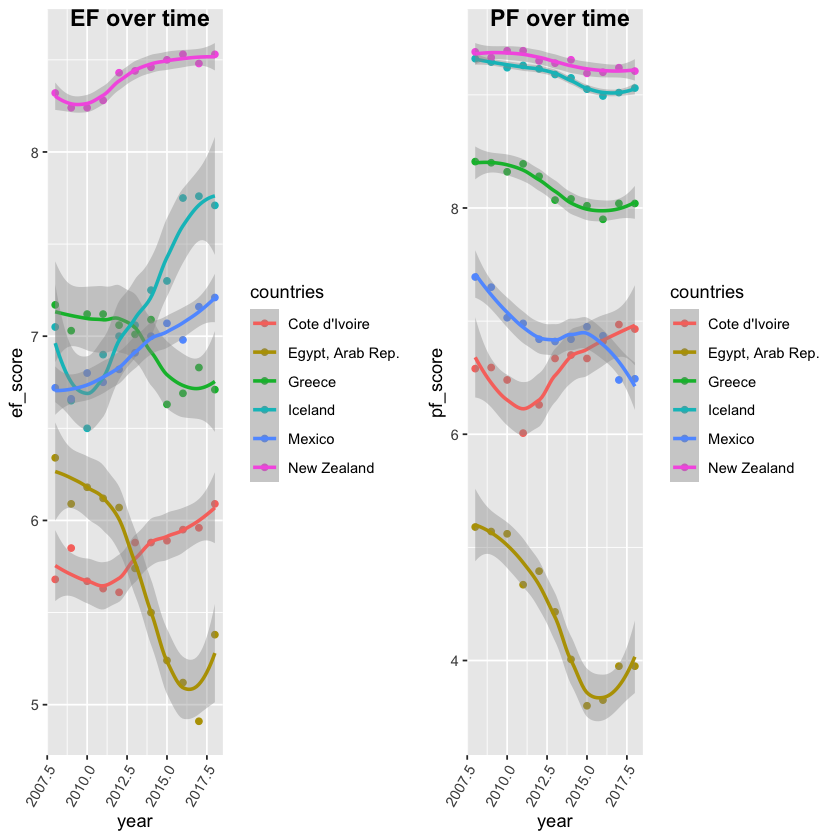

In [13]:
#create subset of these six countries
chosensix <- filter(HFI_raw, countries %in% c("Cote d'Ivoire", "Egypt, Arab Rep.", "Greece", "New Zealand", "Iceland", "Mexico"))

#plot development of ef score over the years 2008-2018 for these countries
devef <- ggplot(chosensix, aes(year, ef_score, col=countries)) + geom_point() + geom_smooth() + theme(axis.text.x = element_text(angle = 60, hjust = 1))

#plot development of pf score over the years 2008-2018 for these countries
devpf <- ggplot(chosensix, aes(year, pf_score, col=countries)) + geom_point() + geom_smooth() + theme(axis.text.x = element_text(angle = 60, hjust = 1))

library(ggplot2)
install.packages("ggpubr")
library(ggpubr)
#show plots next to eachother
ggarrange(devef, devpf, labels = c("EF over time", "PF over time"))

For Cote d'Ivoire, Egypt, and Greece, the graphs follow a highly similar curve on both plots - the development of pf and ef over time is highly correlated. This is the case for an increase, as well as a decrease in the values.
For New Zealand, Iceland, and Mexico, the lines are not similar - they show strongly negative correlations between the development of EF and PF. While the EF score in all three of those places went up after 2008, the PF scores all descended - in the case of Mexico, steeply, in the case of Iceland and New Zealand only slightly. In the case of Mexico, the decrease in PF might have to do with changes in marital/divorce law and higher numbers of homicide, which both negatively affect the personal freedom score.

### 3.5 Exploring the Predictors of HF
The HFI is calculated from numerous weighted variables. Next, I want to explore the intercorrelations between various predictors and show which variables are the strongest predictors of HF in this dataset.

In [14]:
#create a correlation matrix of all predictors and drop categorical and unuseful variables before
cormatrix_predictors <- subset(HFI_NONA, select=-c(X, hf_quartile, hf_rank, ef_rank, pf_rank, year, ISO_code, countries, region))
cor_mat_full <- cor(cormatrix_predictors, use="pairwise.complete.obs")
cor_mat_full

#create a matrix for all p values for these correlations
library("Hmisc")
pval_full <- rcorr(cor_mat_full)
cor_mat_full_p <- pval_full$P
cor_mat_full_p

hf_score   pf_rol_procedural pf_rol_civil
hf_score                           1.0000000  0.9039932         0.7792866   
pf_rol_procedural                  0.9039932  1.0000000         0.8566480   
pf_rol_civil                       0.7792866  0.8566480         1.0000000   
pf_rol_criminal                    0.7939268  0.8871672         0.9372354   
pf_rol                             0.8691378  0.9565424         0.9540516   
pf_ss_homicide                     0.3003916  0.3490014         0.4360267   
pf_ss_disappearances_disap         0.6479831  0.5247081         0.4288146   
pf_ss_disappearances_violent       0.3142745  0.3036878         0.2378836   
pf_ss_disappearances_organized     0.7803230  0.7107559         0.6355166   
pf_ss_disappearances_fatalities    0.3130156  0.2993813         0.2421730   
pf_ss_disappearances_injuries      0.2428163  0.2056040         0.1604715   
pf_ss_disappearances               0.7443473  0.6483595         0.5486177   
pf_ss_women_fgm                    0.1413310  0.2142901         0.1362473   
pf_ss_women_inheritance            0.6316901  0.5732415         0.4929326   
pf_ss_women                        0.6248555  0.5751413         0.4893345   
pf_ss                              0.7135406  0.6991130         0.6978739   
pf_movement_domestic               0.6151456  0.4289181         0.2801685   
pf_movement_foreign                0.6416501  0.4841975         0.2939197   
pf_movement_women                  0.5050138  0.4770376         0.3493448   
pf_movement                        0.7606344  0.5910865         0.3886765   
pf_religion_freedom                0.7134564  0.6082696         0.4097179   
pf_religion_repression             0.7100621  0.6398086         0.4052453   
pf_religion_harassment             0.4464538  0.3543714         0.2077493   
pf_religion_restrictions           0.4124394  0.3089295         0.2371031   
pf_religion                        0.6858350  0.5792191         0.3852570   
pf_association_entry               0.6608453  0.5859831         0.3942713   
pf_association_assembly            0.6056628  0.5995632         0.3975867   
pf_association_barries             0.6380840  0.5983908         0.3566991   
pf_association_bans                0.5190511  0.4403461         0.2122025   
pf_association_estopparties        0.6123448  0.5493452         0.3019048   
⋮                                  ⋮          ⋮                 ⋮           
ef_trade_regulatory_nontariff      0.58994162  0.56068916        0.55568339 
ef_trade_regulatory_compliance     0.76584513  0.72059058        0.59393271 
ef_trade_regulatory                0.80883383  0.76352839        0.65657830 
ef_trade_black                     0.26859314  0.14239528        0.08247587 
ef_trade_movement_foreign          0.80931523  0.69427620        0.57136226 
ef_trade_movement_capital          0.56686470  0.41420683        0.36058201 
ef_trade_movement_visit            0.34544894  0.21853785        0.10526447 
ef_trade_movement                  0.72343799  0.56333640        0.44101032 
ef_trade                           0.84434214  0.68244134        0.52809351 
ef_regulation_credit_ownership     0.47235542  0.28999166        0.18430668 
ef_regulation_credit_private       0.25660185  0.22320020        0.24729938 
ef_regulation_credit_interest      0.23420569  0.15397996        0.11527014 
ef_regulation_credit               0.51841742  0.35114523        0.27616934 
ef_regulation_labor_minwage        0.08475717  0.09941296        0.27936665 
ef_regulation_labor_firing         0.01693165 -0.02670172        0.10549375 
ef_regulation_labor_bargain        0.01166800 -0.15791158       -0.16052868 
ef_regulation_labor_hours          0.02447752  0.01662394        0.12027345 
ef_regulation_labor_dismissal      0.54228874  0.52251465        0.56539452 
ef_regulation_labor_conscription   0.29544921  0.14705928        0.01679481 
ef_regulation_labor                0.42062512  0.29662895        0.35674244 
ef_regulation_business_adm     

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




hf_score     pf_rol_procedural pf_rol_civil
hf_score                                     NA 0.000000e+00      0.000000e+00
pf_rol_procedural                  0.000000e+00           NA      0.000000e+00
pf_rol_civil                       0.000000e+00 0.000000e+00                NA
pf_rol_criminal                    0.000000e+00 0.000000e+00      0.000000e+00
pf_rol                             0.000000e+00 0.000000e+00      0.000000e+00
pf_ss_homicide                     7.355148e-07 6.203464e-10      0.000000e+00
pf_ss_disappearances_disap         0.000000e+00 0.000000e+00      0.000000e+00
pf_ss_disappearances_violent       5.007629e-07 9.963116e-07      3.207442e-05
pf_ss_disappearances_organized     0.000000e+00 0.000000e+00      0.000000e+00
pf_ss_disappearances_fatalities    2.584509e-06 3.445844e-06      1.633305e-05
pf_ss_disappearances_injuries      1.623143e-03 3.423124e-03      1.631045e-02
pf_ss_disappearances               0.000000e+00 0.000000e+00      0.000000e+00
pf_ss_women_fgm                    1.649452e-04 2.106161e-05      1.489678e-04
pf_ss_women_inheritance            0.000000e+00 0.000000e+00      0.000000e+00
pf_ss_women                        0.000000e+00 0.000000e+00      0.000000e+00
pf_ss                              0.000000e+00 0.000000e+00      0.000000e+00
pf_movement_domestic               0.000000e+00 0.000000e+00      1.076649e-08
pf_movement_foreign                0.000000e+00 4.440892e-16      1.441560e-07
pf_movement_women                  0.000000e+00 0.000000e+00      1.509903e-14
pf_movement                        0.000000e+00 0.000000e+00      8.733148e-11
pf_religion_freedom                0.000000e+00 0.000000e+00      7.725507e-10
pf_religion_repression             0.000000e+00 0.000000e+00      8.325085e-10
pf_religion_harassment             1.899503e-11 4.794750e-08      1.653563e-03
pf_religion_restrictions           1.930456e-12 8.972885e-10      1.267207e-04
pf_religion                        0.000000e+00 0.000000e+00      6.090390e-08
pf_association_entry               0.000000e+00 0.000000e+00      7.589029e-10
pf_association_assembly            0.000000e+00 0.000000e+00      3.773648e-12
pf_association_barries             0.000000e+00 0.000000e+00      4.805045e-10
pf_association_bans                0.000000e+00 7.220891e-13      8.249290e-06
pf_association_estopparties        0.000000e+00 0.000000e+00      5.233171e-08
⋮                                  ⋮            ⋮                 ⋮           
ef_trade_regulatory_nontariff      0.000000e+00 0.000000e+00      0.000000e+00
ef_trade_regulatory_compliance     0.000000e+00 0.000000e+00      0.000000e+00
ef_trade_regulatory                0.000000e+00 0.000000e+00      0.000000e+00
ef_trade_black                     1.163417e-05 9.142910e-04      8.166229e-03
ef_trade_movement_foreign          0.000000e+00 0.000000e+00      0.000000e+00
ef_trade_movement_capital          0.000000e+00 0.000000e+00      2.109424e-13
ef_trade_movement_visit            7.273760e-09 3.384455e-05      5.225869e-02
ef_trade_movement                  0.000000e+00 0.000000e+00      1.199041e-14
ef_trade                           0.000000e+00 0.000000e+00      0.000000e+00
ef_regulation_credit_ownership     1.865175e-14 3.763371e-09      1.310199e-05
ef_regulation_credit_private       4.257248e-03 2.839545e-03      2.210694e-05
ef_regulation_credit_interest      2.437238e-02 4.580196e-02      1.128957e-02
ef_regulation_credit               3.805845e-13 1.581196e-09      1.301583e-08
ef_regulation_labor_minwage        7.873255e-01 6.128652e-01      2.536926e-03
ef_regulation_labor_firing         6.573100e-04 3.290308e-03      5.868119e-01
ef_regulation_labor_bargain        1.138598e-09 4.267697e-13      2.036384e-10
ef_regulation_labor_hours          1.701604e-03 6.208748e-03      2.929361e-01
ef_regulation_labor_dismissal      0.000000e+00 0.000000e+00      0.000000e+00
ef_regulation_labor_conscription   4.655430e-07 8.044057e-05      2.140936e-02
ef_reg

This table is too big to be interpreted, so I will narrow it down by filtering out cases with insignificant p-values for the correlation and then correlations weaker than +/-.7.

In [50]:
install.packages("reshape") 
library(reshape)

#melt both tables
pvalues.melt <- melt(cor_mat_full_p)
stats.corr.melt <- melt(cor_mat_full)

#save stats as vector and add it as a column to the p-value df
stats <- as.vector(stats.corr.melt$value)
pvalues.stats <- cbind(pvalues.melt, stats)
pvalues.stats

#filter for sign. p-values and then drop the p-values column
pvalues.filter <- filter(pvalues.stats, value < 0.05) %>% subset(select = -value )

#filter for strong correlations 
stats.filter <- filter(pvalues.filter, stats < -0.7 | stats > 0.7)
cortable <- stats.filter %>% arrange(desc(stats))
cortable


The downloaded binary packages are in
	/var/folders/3n/g4p4960s3wx9bqgjvhfjz07c0000gn/T//RtmpnYNcI8/downloaded_packages


X1                                 X2             value       
1     hf_score                           hf_score                 NA
2     pf_rol_procedural                  hf_score       0.000000e+00
3     pf_rol_civil                       hf_score       0.000000e+00
4     pf_rol_criminal                    hf_score       0.000000e+00
5     pf_rol                             hf_score       0.000000e+00
6     pf_ss_homicide                     hf_score       7.355148e-07
7     pf_ss_disappearances_disap         hf_score       0.000000e+00
8     pf_ss_disappearances_violent       hf_score       5.007629e-07
9     pf_ss_disappearances_organized     hf_score       0.000000e+00
10    pf_ss_disappearances_fatalities    hf_score       2.584509e-06
11    pf_ss_disappearances_injuries      hf_score       1.623143e-03
12    pf_ss_disappearances               hf_score       0.000000e+00
13    pf_ss_women_fgm                    hf_score       1.649452e-04
14    pf_ss_women_inheritance            hf_score       0.000000e+00
15    pf_ss_women                        hf_score       0.000000e+00
16    pf_ss                              hf_score       0.000000e+00
17    pf_movement_domestic               hf_score       0.000000e+00
18    pf_movement_foreign                hf_score       0.000000e+00
19    pf_movement_women                  hf_score       0.000000e+00
20    pf_movement                        hf_score       0.000000e+00
21    pf_religion_freedom                hf_score       0.000000e+00
22    pf_religion_repression             hf_score       0.000000e+00
23    pf_religion_harassment             hf_score       1.899503e-11
24    pf_religion_restrictions           hf_score       1.930456e-12
25    pf_religion                        hf_score       0.000000e+00
26    pf_association_entry               hf_score       0.000000e+00
27    pf_association_assembly            hf_score       0.000000e+00
28    pf_association_barries             hf_score       0.000000e+00
29    pf_association_bans                hf_score       0.000000e+00
30    pf_association_estopparties        hf_score       0.000000e+00
⋮     ⋮                                  ⋮              ⋮           
10787 ef_trade_regulatory_nontariff      womens_freedom 3.463597e-05
10788 ef_trade_regulatory_compliance     womens_freedom 0.000000e+00
10789 ef_trade_regulatory                womens_freedom 0.000000e+00
10790 ef_trade_black                     womens_freedom 4.564913e-04
10791 ef_trade_movement_foreign          womens_freedom 0.000000e+00
10792 ef_trade_movement_capital          womens_freedom 1.332268e-15
10793 ef_trade_movement_visit            womens_freedom 3.270691e-08
10794 ef_trade_movement                  womens_freedom 0.000000e+00
10795 ef_trade                           womens_freedom 0.000000e+00
10796 ef_regulation_credit_ownership     womens_freedom 5.723813e-09
10797 ef_regulation_credit_private       womens_freedom 4.599552e-02
10798 ef_regulation_credit_interest      womens_freedom 8.618714e-01
10799 ef_regulation_credit               womens_freedom 1.241764e-06
10800 ef_regulation_labor_minwage        womens_freedom 9.354554e-04
10801 ef_regulation_labor_firing         womens_freedom 3.726164e-09
10802 ef_regulation_labor_bargain        womens_freedom 4.060092e-10
10803 ef_regulation_labor_hours          womens_freedom 1.767307e-09
10804 ef_regulation_labor_dismissal      womens_freedom 5.950795e-14
10805 ef_regulation_labor_conscription   womens_freedom 2.273929e-02
10806 ef_regulation_labor                womens_freedom 7.526212e-01
10807 ef_regulation_business_adm         womens_freedom 2.343787e-03
10808 ef_regulation_business_bureaucracy womens_freedom 0.000000e+00
10809 ef_regulation_business_start       womens_freedom 2.661823e-09
10810 ef_regulation_business_bribes      womens_freedom 2.220446e-16
10811 ef_regulation_business_licensing   womens_freedom 6.598542e-02
10812 ef_regulation_business_compliance  womens_freedom 6.894756e-02
1081

X1                             X2                             stats     
1   pf_ss_women                    pf_ss_women_inheritance        0.9952479 
2   pf_ss_women_inheritance        pf_ss_women                    0.9952479 
3   pf_rol                         pf_rol_criminal                0.9707728 
4   pf_rol_criminal                pf_rol                         0.9707728 
5   ef_trade_regulatory            ef_trade_regulatory_compliance 0.9684874 
6   ef_trade_regulatory_compliance ef_trade_regulatory            0.9684874 
7   pf_rol                         pf_rol_procedural              0.9565424 
8   pf_rol_procedural              pf_rol                         0.9565424 
9   pf_score                       hf_score                       0.9556086 
10  hf_score                       pf_score                       0.9556086 
11  pf_association_estopparties    pf_association_barries         0.9541799 
12  pf_association_barries         pf_association_estopparties    0.9541799 
13  pf_rol                         pf_rol_civil                   0.9540516 
14  pf_rol_civil                   pf_rol                         0.9540516 
15  pf_association_estopparties    pf_association_bans            0.9445209 
16  pf_association_bans            pf_association_estopparties    0.9445209 
17  ef_legal                       pf_rol                         0.9430934 
18  pf_rol                         ef_legal                       0.9430934 
19  pf_rol_criminal                pf_rol_civil                   0.9372354 
20  pf_rol_civil                   pf_rol_criminal                0.9372354 
21  pf_association                 pf_association_barries         0.9322909 
22  pf_association_barries         pf_association                 0.9322909 
23  pf_identity_sex                pf_identity_sex_male           0.9310646 
24  pf_identity_sex_male           pf_identity_sex                0.9310646 
25  ef_legal                       pf_rol_criminal                0.9301324 
26  pf_rol_criminal                ef_legal                       0.9301324 
27  pf_score                       pf_rol_procedural              0.9290660 
28  pf_rol_procedural              pf_score                       0.9290660 
29  pf_religion                    pf_religion_freedom            0.9285319 
30  pf_religion_freedom            pf_religion                    0.9285319 
⋮   ⋮                              ⋮                              ⋮         
633 pf_score                       pf_ss_disappearances            0.7041327
634 pf_ss_disappearances           pf_score                        0.7041327
635 ef_regulation                  ef_legal_courts                 0.7040399
636 ef_legal_courts                ef_regulation                   0.7040399
637 ef_government_soa              pf_association                  0.7031008
638 pf_association                 ef_government_soa               0.7031008
639 pf_identity_sex_male           pf_ss_women_inheritance         0.7025633
640 pf_ss_women_inheritance        pf_identity_sex_male            0.7025633
641 pf_association_estopparties    pf_movement                     0.7021951
642 pf_movement                    pf_association_estopparties     0.7021951
643 pf_expression_newspapers       pf_religion                     0.7013822
644 pf_religion                    pf_expression_newspapers        0.7013822
645 ef_legal_enforcement           ef_legal_integrity              0.7000233
646 ef_legal_integrity             ef_legal_enforcement            0.7000233
647 ef_government_transfers        pf_rol_criminal                -0.7012425
648 pf_rol_criminal                ef_government_transfers        -0.7012425
649 ef_government_transfers        pf_rol_civil                   -0.7022191
650 pf_rol_civil                   ef_government_transfers        -0.7022191
651 ef_government_transfers        pf_score                       -0.7156212
652 pf_score                       ef_government_transfers        -0.7156212


#### 3.5.1 The Influence of Size of Government on HF
Below, I show what does the correlation of the variable "size of government" with HFI looks like. The cor.test tells us that there is a small, yet significant correlation between the variables (.12). We can see from the table of all correlations that size of government only correlates strongly (>.7) with government consumption, top marginal tax rate and transfers (as a share of GDP). This allows us to say that size of government does not influence HF much.

In [54]:
#see if there is sign. correlation between size of government and HF score
cor.test(~ ef_government + hf_score, data=HFI_raw)

#filter correlations for size of government from cortable
cortable %>% filter(X1 == "ef_government")


	Pearson's product-moment correlation

data:  ef_government and hf_score
t = 5.892, df = 1700, p-value = 4.591e-09
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.09458581 0.18771687
sample estimates:
      cor 
0.1414643 


X1            X2                        stats    
1 ef_government ef_government_consumption 0.8164162
2 ef_government ef_government_tax         0.7335338
3 ef_government ef_government_transfers   0.7264844

#### 3.5.2 The Relationship between Business Regulations and HF
Below, I check how business regulations are associated HF. This variables measures how burdensome and costly the administrative requirements in a country are, how long it takes to open a business, how much nepotism there is and how high the cost of tax compliance is - a lower score means less of all this.
The Pearson's product-moment correlation shows a significant and quite strong (.71) correlation between the two variables. We can see that not only variables for sound legal structures, but also the personal freedom score has a strong correlation (.72) to business regulations.

In [56]:
#see if there is sign. correlation between regulation and HF score
cor.test(~ ef_regulation_business + hf_score, data=HFI_raw)

#filter correlations for size of government from cortable
cortable %>% filter(X1 == "ef_regulation_business")


	Pearson's product-moment correlation

data:  ef_regulation_business and hf_score
t = 42.689, df = 1696, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6959510 0.7418663
sample estimates:
      cor 
0.7196946 


X1                     X2                                 stats    
1  ef_regulation_business ef_legal_courts                    0.8767868
2  ef_regulation_business ef_legal                           0.8710472
3  ef_regulation_business pf_rol_criminal                    0.8374205
4  ef_regulation_business pf_rol                             0.8362733
5  ef_regulation_business ef_legal_protection                0.8238855
6  ef_regulation_business ef_legal_police                    0.8192778
7  ef_regulation_business pf_rol_civil                       0.8098319
8  ef_regulation_business ef_regulation_business_bureaucracy 0.8091279
9  ef_regulation_business ef_regulation                      0.8009403
10 ef_regulation_business ef_legal_integrity                 0.7993021
11 ef_regulation_business ef_legal_judicial                  0.7976298
12 ef_regulation_business ef_regulation_business_bribes      0.7907121
13 ef_regulation_business pf_rol_procedural                  0.7866501
14 ef_regulation_business hf_score                           0.7849094
15 ef_regulation_business ef_legal_enforcement               0.7340081
16 ef_regulation_business ef_score                           0.7277109
17 ef_regulation_business ef_trade_regulatory_nontariff      0.7272667
18 ef_regulation_business pf_score                           0.7196622
19 ef_regulation_business ef_trade_regulatory                0.7110978

### 3.6 Building a Model to Predict HFI
As a last step, I will build a model which can predict HFI in the future. I will run a mixed effects model, with separate intercepts and slopes for each country.


I will split my dataset in a group of 6 and one of 5 years' worth of data and use the data from years 2008-2013 as training data. Then I could use the data from 2014-2018 to test my model. I plan to first try to fit a linear regression model and check its fit. If it does not show an adequate fit, I will try non-linear models.

In [ ]:
#
library("lme4")
mixed_ml0 <- lmer(hf_score ~ Length + (Length|Sub_ID), data=HFI_raw)
summary(mixed_ml2)


# strap some boots

### 3.8 Somehow throw Bootstrap in there


£ The attained model...

## 4. Conclusions
£

## Bibliography

Berlin, I. (1969). Four Essays On Liberty. Oxford University Press.

Vásquez, I., & McMahon, F. (2020). The Human Freedom Index 2020. Cato Institue and Fraser Institute. Retrieved from https://www.fraserinstitute.org/sites/default/files/human-freedom-index-2020.pdf 